# Исследование объявлений о продаже квартир в Санкт-Петербурге

<a id='step_0'></a><h3>Оглавление</h3>


[1. Описание проекта](#step_1)  
    [1.1 Загрузка библиотек и файла с данными. Изучение общей информации](#step_1.1)  
        [1.1.1 Первые наблюдения, выделяем важное](#step_1.1.1)   
        [1.1.2 Исследуем матрицу корреляции](#step_1.1.2)  
        [1.1.3  Исследуем общие гистограммы датасета](#step_1.1.3)   
[2. Предобработка данных](#step_2)   
    [2.1 Странности датафрейма из таблицы описания, план действий по предобработке](#step_2.1)  
    [2.2 Проверка на явные дубликаты](#step_2.2)  
    [2.3 Рассмотрим долю пропусков в столбцах](#step_2.3)  
        [2.3.1 заполняем пропуски в общей этажности](#step_2.3.1)  
        [2.3.2 выявляем и заполняем пропуски в названиях населенных пунктов](#step_2.3.2)  
        [2.3.3 надо привести в соответствие 0 комнат - это студия(если студия и 1 комната - поменяем)](#step_2.3.3)  
        [2.3.4 минимальная жилая площадь - исправяем данные](#step_2.3.4)  
        [2.3.5 Площадь кухни - построим гистограмму, проверим теорию - квартиры с маленькими площадями кухни - это всё студии. Большие кухни, что считать выбросами](#step_2.3.5)  
    [2.4 Высота потолков, привести в соответствие от 2,5 до 5 метров (в Питере бывают квартиры с высокими потолками), если аномалии останутся - проверить сколько их и решить - избавляться от них или еще раз править](#step_2.4)  
    [2.5 исследуем расстояние до центра города cityCenters_nearest, удалим пропуски, заменим на адекватные значения](#step_2.5)  
    [2.6 Построим гистограмму расстояния до аэропорта - определим какая часть квартир находится в непосредственной близости? То же самое с расстоянием до водоема и до парка](#step_2.6)  
    [2.7 заменим пропуски в столбцах аппатраменты, балконы и кухни-столовые](#step_2.7)  
    [2.8 изменим тип данных в дате выставления объявления на числовой](#step_2.8)  
[3. Добавляем необходимые параметры данных (столбцы)](#step_3)      
    [3.1 цена квадратного метра (в тыс. руб.)](#step_3.1)  
    [3.1.1'Влиание булевых столбцов ( 'is_apartment', 'studio', 'open_plan') на цену квадратного метра (в тыс. руб.)](#step_3.1.1)  
    [3.2 день недели, месяц и год публикации объявления](#step_3.2)    
    [3.3 этаж квартиры; варианты — первый, последний, другой](#step_3.3)  
    [3.4 перводим цену в миллионы](#step_3.4)  
[4. Исследовательский анализ данных ](#step_4)   
    [4.1   План исследования, основные параметры объектов](#step_4.1)  
        [4.1.1 Изучим основные параметры. Построим гистограммы для каждого параметра](#step_4.1.1)   
        [4.1.2 Изучим время продажи квартиры. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа](#step_4.1.2)   
        [4.1.3 Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили. Общий результат удаления](#step_4.1.3)   
        [4.1.4 Выводы по полученным гистограммам и диаграммам размаха](#step_4.1.4)   
        [4.1.5 Какие факторы больше всего влияют на стоимость квартиры?](#step_4.1.5)   
    [4.2  Выводы о зависимости стоимости кв метра:](#step_4.2)   
        [4.2.1 От общей площади ](#step_4.2.1)   
        [4.2.2  От жилой площади квартиры ](#step_4.2.2)   
        [4.2.3 От количества комнат ](#step_4.2.3)   
        [4.2.4 От категории удаленности от центра города ](#step_4.2.4)   
        [4.2.5 от даты размещения объявления  ](#step_4.2.5)   
        [4.2.6 От категории "первый, верхний и другой" ](#step_4.2.6)   
        [4.2.7 От дня недели ](#step_4.2.7)   
        [4.2.8 От месяца](#step_4.2.8)   
        [4.2.9 От года ](#step_4.2.9)   
    [4.3  ТОП 10 населённых пунктов](#step_4.3)   
    [4.4  Зависимость цены от удаленности от центра в Санкт-Петербурге. Зона центра.](#step_4.4)  
    [4.5   Санкт-Петербург центр и окраина в чем разница по основным параметрам](#step_4.5)  
    [4.6 Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)матрица корреляций](#step_4.6)  
    [4.7  Графики зависимости цены кв. м от основных показателей](#step_4.7)  
        [4.7.1  Выводы](#step_4.7.1)  
[5. Общий вывод ](#step_5)  
[5.1 Вывод для автоматизации параметров ](#step_5.1) 

<a id='step_1'></a><h3>1. Описание проекта</h3>

[К оглавлению](#step_0)

По данным **сервиса Яндекс.Недвижимость** (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет) надо научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире, выставленную на продажу доступны два вида данных. Первые - вписаны пользователем, вторые — получены автоматически, на основе картографических данных (например: расстояние до центра, аэропорта, ближайшего парка и водоёма). 


**Описание данных:**

  **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
  
  **balcony** — число балконов
  
  **ceiling_height** — высота потолков (м)
  
  **cityCenters_nearest** — расстояние до центра города (м)
  
  **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
  
  **first_day_exposition** — дата публикации
  
  **floor** — этаж
  
  **floors_total** — всего этажей в доме
  
  **is_apartment** — апартаменты (булев тип)
  
  **kitchen_area** — площадь кухни в квадратных метрах (м²)
  
  **last_price** — цена на момент снятия с публикации
  
  **living_area** — жилая площадь в квадратных метрах(м²)
  
  **locality_name** — название населённого пункта
  
  **open_plan** — свободная планировка (булев тип)
  
  **parks_around3000** — число парков в радиусе 3 км
  
  **parks_nearest** — расстояние до ближайшего парка (м)
  
  **ponds_around3000** — число водоёмов в радиусе 3 км
  
  **ponds_nearest** — расстояние до ближайшего водоёма (м)
  
  **rooms** — число комнат
  
  **studio** — квартира-студия (булев тип)
  
  **total_area** — площадь квартиры в квадратных метрах (м²)
  
  **total_images** — число фотографий квартиры в объявлении
  

<a id='step_1.1'></a><h3>1.1  Загрузка библиотек и файла с данными. Изучение общей информации.</h3>

[К оглавлению](#step_0)  

In [1]:
# Загружаем библиотеки
import pandas as pd
import math
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
# открываем файл, разделитель \t
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#распечатываем первые 10 строк
data.head(10)
 

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

<a id='step_1.1.1'></a><h3>1.1.1 Первые наблюдения, выделяем важное</h3>

[К оглавлению](#step_0)   



In [3]:
# смотрим пропуски в таблице:
print(data.isna().sum())
#выводим информацию о таблице
data.info()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_are

Мы видим, что добавились пропуски в 2х столбцах:

- **'locality_name'** - этот столбец важный, пропуски в нем следует удалить, потому что если в объявлении нет данных о местоположении объекта недвижимости, то эти данные никак не помогут в определении цен других объектов, к счастью таких объявлений незначительное количество (49, это около 0,2%)  
Кроме того, поскольку информацию в этом столбце заполняли пользователи, то, вполне вероятно, разное написание одних и тех же населенных пунктов, поэтому следует поискать и заменить в нем неявные дубликаты

- **'floors_total'**  (общая этажность) - важно чтобы определить какой тип этажа - первый, последний, другой

Нам надо провести исследование в котором должны быть задействованы критерии в которых есть пропуски:

- жилая площадь(**living_area**);
- площадь кухни(**kitchen_area**);
- **floors_total** - есть пропуски - важно,**floor** - нет пропусков (этаж, на котором расположена квартира (первый, последний, другой);
- **first_day_exposition** - нет пропусков (дата размещения (день недели, месяц, год)
- **'days_exposition'** (есть пропуски в столбце)
 

#### Вывод:  
Данные сервиса Яндекс.Недвижимость представлены таблицей, 22 столбца, 23699 строк. 

В столбцах выведенного верха таблицы **есть пропуски** (NaN)   

часть пропусков приходится на **важные** данные:  

**'ceiling_height'** - высота потолков,   
**'living_area'** - жилая площадь,   
**'kitchen_area'** - площадь кухни,   
**'airports_nearest'** - близость аэропорта,   
**'cityCenters_nearest'**  расстояние до центра города (м),   
**'parks_nearest'** - расстояние до ближайшего парка (м),   
**'ponds_nearest'** - расстояние до ближайшего водоёма (м),   
**'days_exposition'** - сколько дней было размещено объявление (от публикации до снятия),  
**'locality_name'** - наименование населенного пункта, 

**Столбцы с важной информацией** без пропусков:   

**'total_area'** - Общая площадь,   
**'last_price'** - цена,   
**'rooms'** - число комнат,   
**'floor'** - этаж квартиры,   
**'floors_total'** - этаж дома,   
**'first_day_exposition'** - день недели и месяц подачи объявления,   



Часть пропусков присутствует в столбцах с **не важной** информацией -

**'is_apartment'** - является ли аппартаментами,   
**'balcony'** - балконы,   
**'parks_around3000'** - число парков в радиусе 3 км,   
**'ponds_around3000'** - число водоёмов в радиусе 3 км. 


**Столбцы с не важной информацией** без пропусков:   
  

**'total_images'** - количество фото,   
**'studio'** - студия или нет,     
**'open_plan'** - планоровка "открытый план"     

Будем работать с пропусками и дубликатами (предобработка) в важных столбцах, остальные оставим (по возможности) без изменений.

<a id='step_1.1.2'></a><h3>1.1.2  Исследуем матрицу корреляции и гистограммы датасета</h3>   

[К оглавлению](#step_0)   



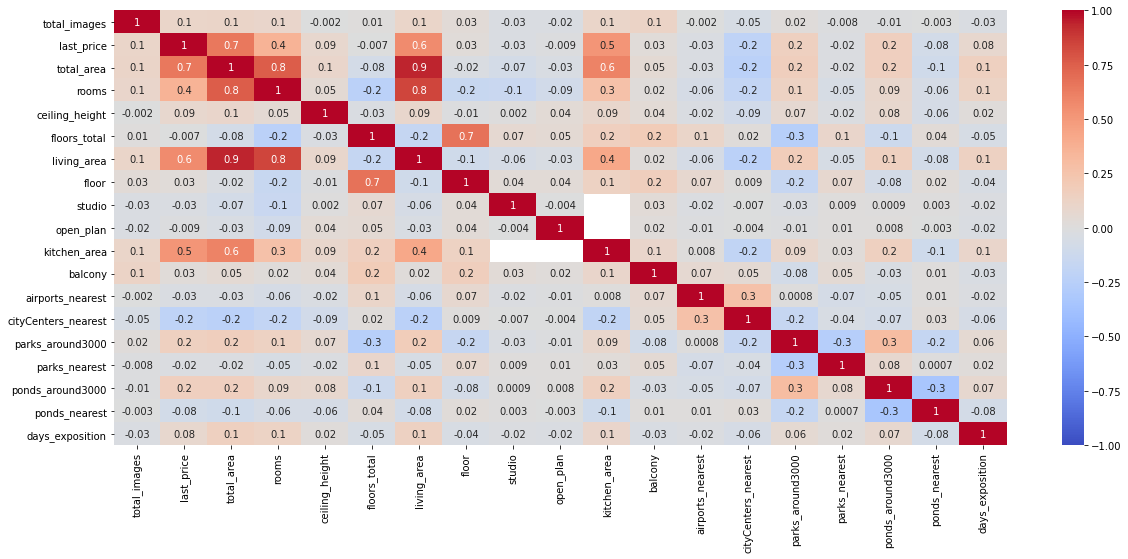

In [4]:
#матрица корреляций
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

#### Вывод:    

мы видим **прямую сильную корреляцию** между:

- последней ценой и общей площадью, 
- жилой площадью и общей площадью, 
- количеством комнат и общей площадью, 
- количеством комнат и жилой площадью, 
- последняя цена и жилой площадью, 
- площадь кухни - последняя цена и общая площадь

и **обратную корреляцию между**:

- парк рядом и парк в количеством парков в радиусе 3 км, 
- водоем рядом и водоем в количеством парков в радиусе 3 км, 
- высотой здания и количеством парков в радиусе 3 км

<a id='step_1.1.3'></a><h3>1.1.3  Исследуем общие гистограммы датасета</h3>   

[К оглавлению](#step_0)   



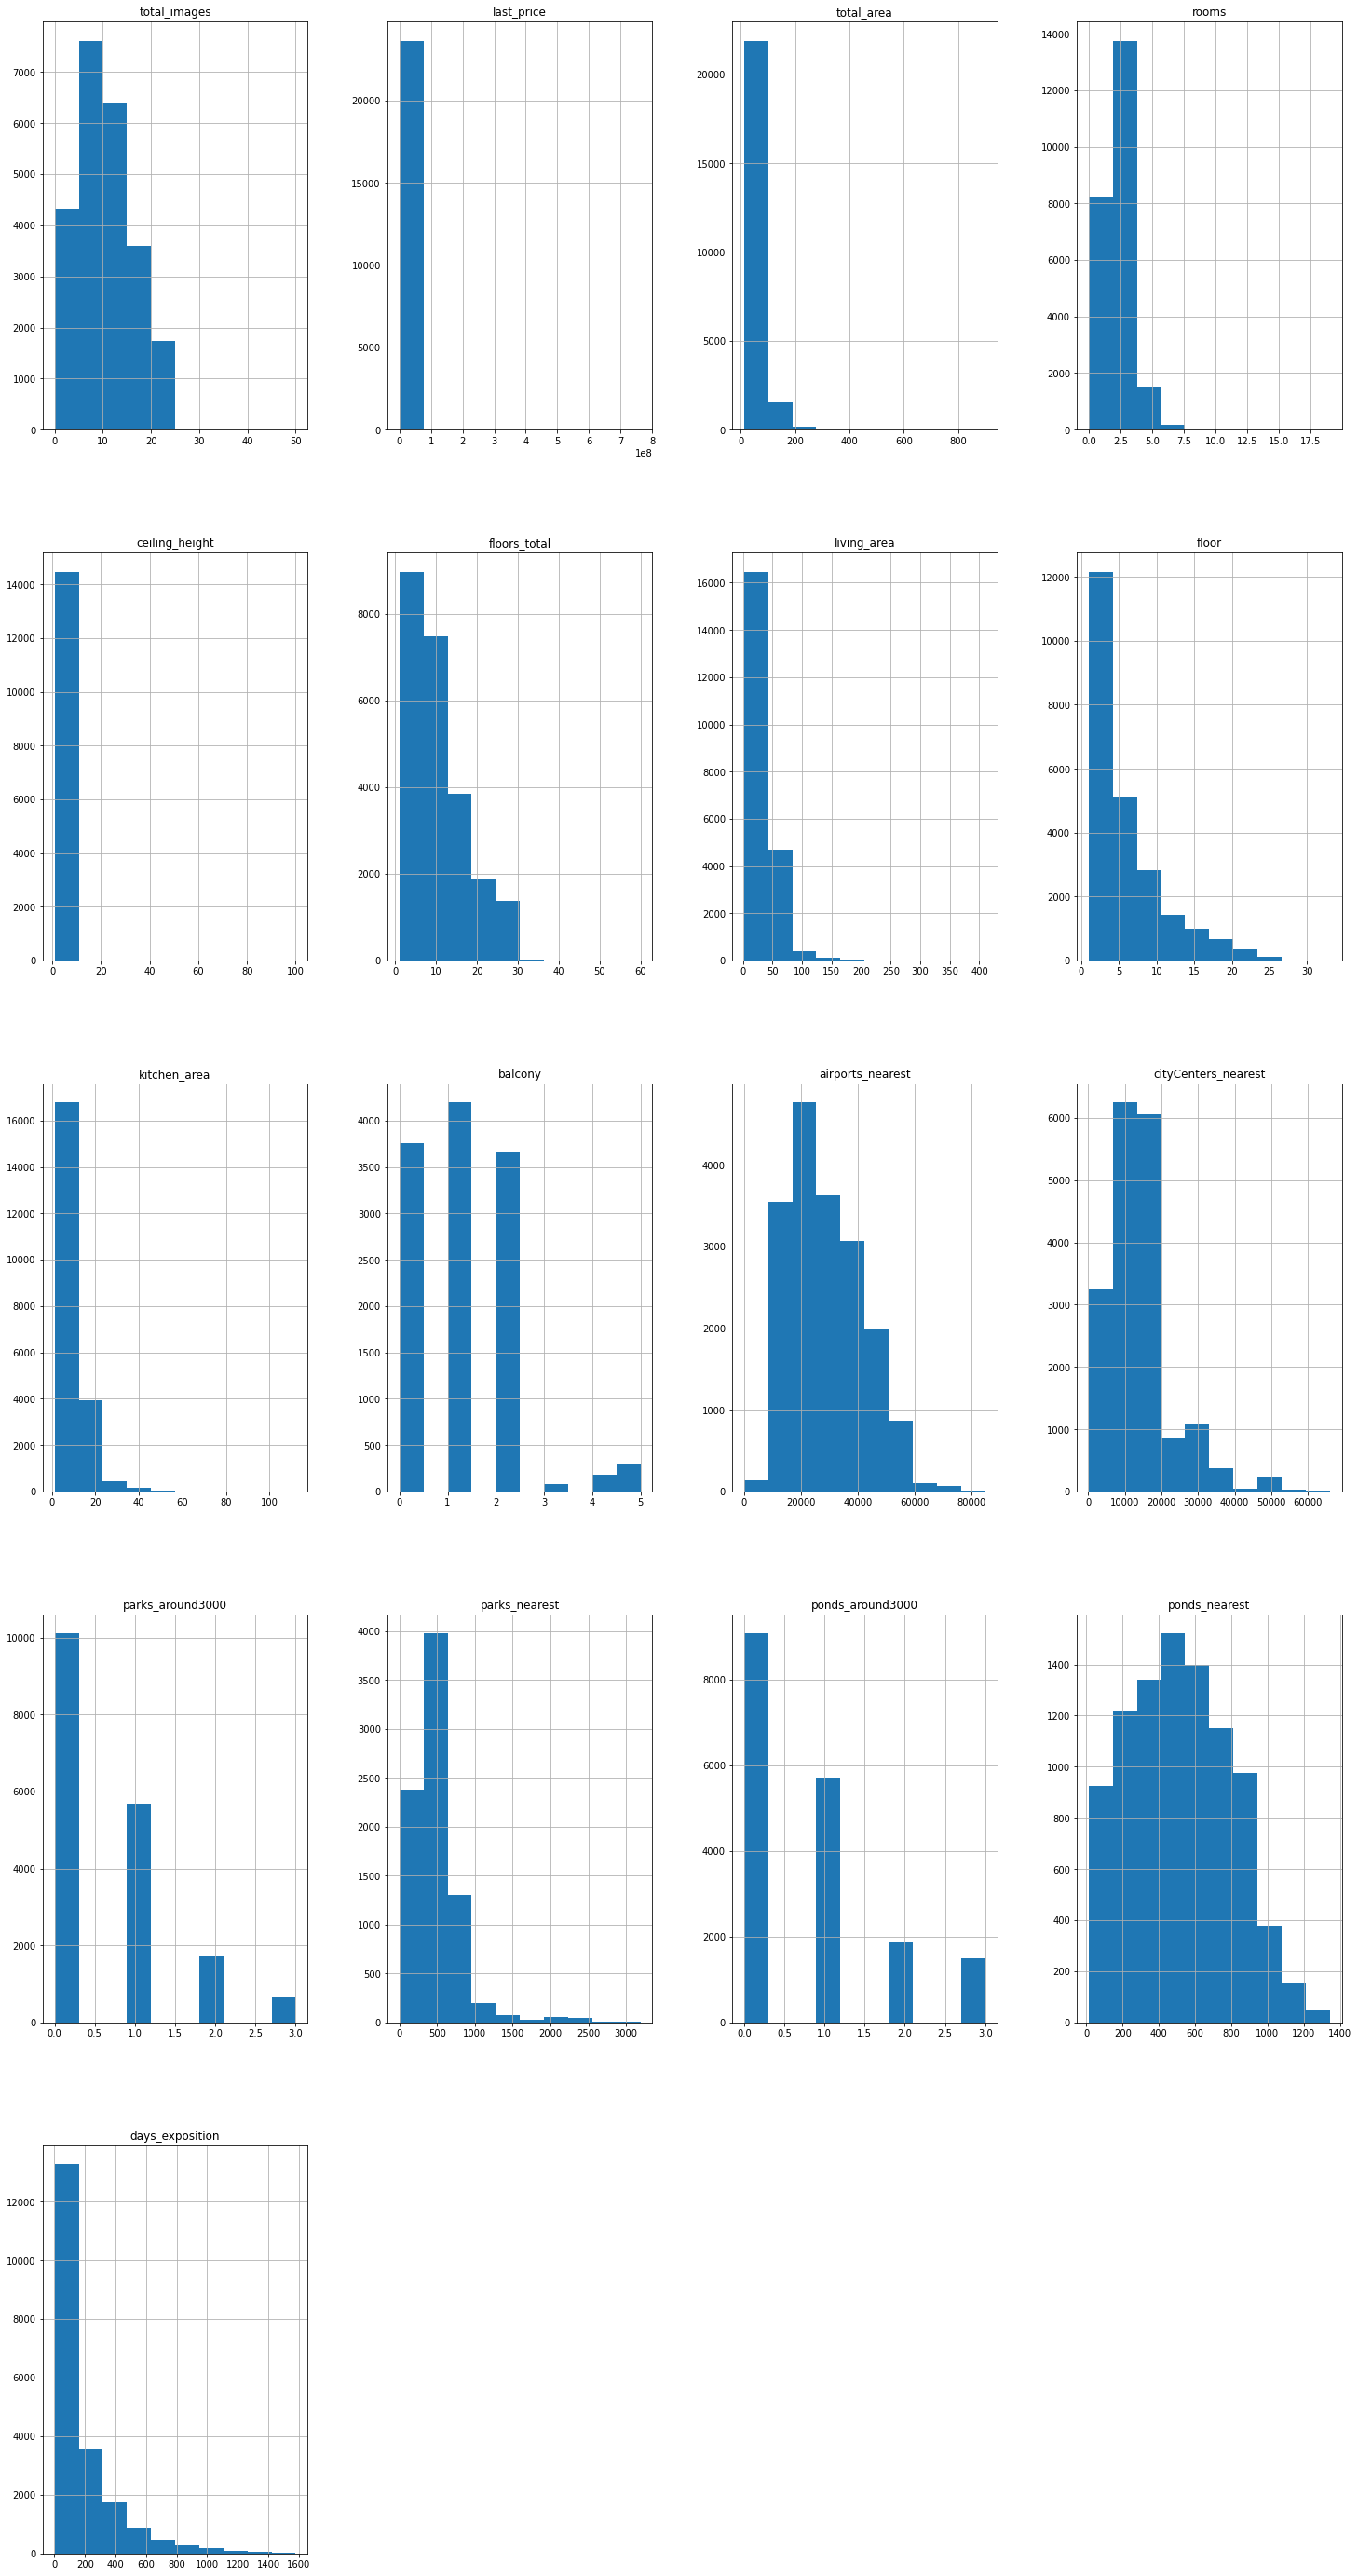

In [5]:
# гистограммы датасета
data.hist(figsize=(25, 50))
plt.show()

#### Вывод:    
По результатам вывода на экран гистограмм столбцов датасета мы видим, что в среднем при подаче объявления:
- выкладывают от 5 до 10 фото;  
- последняя цена порядка до 50 млн при снятии объявления;  
- общая площадь до 100 кв.метров;  
- в среднем в квартире 2-3 комнаты;  
- потолки - до 10 метров;  
- больше всего квартир в 1-8 этажных домах;  
- больше всего квартир с жилой площадью до 45 кв. метров;  
- больше всего квартир расположенных на 1-4 этажах;  
- больше всего квартир с кухнями до 13 метров;  
- больше всего квартир с одним балконом, почти столько же без балкона или с 2-мя;  
- больше всего квартир с расстоянием до аэропорта чуть больше чем 20000 метров;  
- больше всего квартир на расстоянии от центра от 8 до 20 км;  
- больше всего квартир рядом с которыми нет парков в радиусе 3 км;  
- в среднем до парка 500 м;  
- больше всего квартир расположено от водоема далее чем 3 км;  
- самое частое расстояние до водоема - 500 м;  
- больше всего квартир продается в срок до 180 дней (пол года).  


<a id='step_2'></a><h3>2 Предобработка данных</h3>   

[К оглавлению](#step_0)

<a id='step_2.1'></a><h3>2.1 Странности датафрейма из таблицы описания, план действий по предобработке</h3>   

[К оглавлению](#step_0)

In [6]:
#выведем таблицу описания данных в колонках
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

**Вывод**:  

Выведя описание столбцов таблицы, что видим странного?: 

- минимальное кол-во комнат - ноль,

- минимальная стоимость квартиры 12190 рублей,  

- минимальная высота потолков 1 метр,

- максимальная высота потолков 100 метров

- минимальная жилая площадь - 2 метра (это гроб что ли? с каких пор гробы стали недвижимостью?)

- минимальная площадь кухни 1,3 метра - такое возможно только в студиях, иначе - это выброс

- расстояние до аэропорта 0 метров - это комната в аэропорту? кто ее может продать? - однозначно аномалия

- минимальное расстояние до парка 1 метр? - жилье в парке? ну допустим... это же не аэропорт, хотя в парках запрещено жилищное строительство

- минимальное расстояние до водоема 13 метров Это же Питер - набережные!!! тогда 13 метров - реальное расстояние

- максимальное количество дней размещения объявления 1580 - это 4 года и 4 месяца, наверное за этот срок любая цена сможет стать нормальной, вообще-то для очень дорогой недвижимости такое вполне может быть, главное чтобы срок размещения объявления не был больше чем срок жизни площадки для размещения объявления, тогда это будет выброс, проверить мы это все равно не сможем, поэтому примем за аксиому что это просто очень дорогое и медленно продающееся жилье  

**План действий по преодолению "странностей"**: 

1) заполняем пропуски в общей этажности **floor**

2) удаляем строки с пропусками в столбце **locality_name**

3) надо привести в соответствие данные о студиях **rooms-studio**:
- 0 комнат - это студия;
- если студия и 1 комната - меняем на 0 комнат;

4) минимальная жилая площадь **living_area**  - исправяем данные, вывести на экран все квартиры с общей площадью до 10 метров - таких маленьких не бывает - мы же не в Гонконге, даже у дворников комнаты больше. Это выбросы, удаляем картиры с жилой площадью менее 6 кв метра (ограничение по законодательству)

5) рассмотреть площадь кухни **kitchen_area** - построить гистограмму, проверить теорию что квартиры с маленькими площадями кухни - это всё студии

6) исследовать высоту потолков **ceiling_height**, привести в соответствие от 2,5 до 5 метров (в Питере бывают квартиры с высокими потолками), если аномалии останутся - проверить сколько их и решить - избавляться от них или еще раз править

7) исследовать расстояние до центра города **cityCenters_nearest**, удалить пропуски, заменить на адекватные значения

8) Построить гистограмму расстояния до аэропорта **airports_nearest**. То же самое с расстоянием до водоема **ponds_nearest** и до парка **parks_nearest**, определить зоны выбросов, решить что делать с ними

9) заменим пропуски в столбцах аппатраменты **is_apartment** и балконы **balcony**

10) изменим тип данных в дате выставления объявления на числовой

<a id='step_2.2'></a><h3>2.2 Проверка на явные дубликаты</h3>   

[К оглавлению](#step_0)   


In [7]:
#выводим на экран количество явных дубликатов
data.duplicated().sum()

0

#### Вывод:
явных дубликатов нет

<a id='step_2.3'></a><h3>2.3 Рассмотрим долю пропусков в столбцах</h3>   

[К оглавлению](#step_0)  


In [8]:
#выводим количество пропусков в каждом из столбцов

pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

#### Вывод:
выведя долю пропусков - мы видим, что **очень много пропусков(более 60%)** - 

  в столбце близость от парка, **parks_nearest**   
  близость от водоема **ponds_nearest** и  
  
  *апартаменты(не важно)*, **is_apartment**   

**много пропусков (от 20 до 59%)** -   

  близость до аэроорта, **airports_nearest**   
  близость до центра города, **cityCenters_nearest**   
  высота потолков,  **ceiling_height**  
  
  *кол-во балконов (не важно)* **balcony**   
  *кол-во парков в радиусе 3 км **parks_around3000**(не важно) и*   
  *водоемов в радиусе 3 км **ponds_around3000**(не важно)*    


**мало пропусков, но больше статистической погрешности 3% (3-19%)**-  

  количество дней размещения объявления,days_exposition	  
  площадь кухни, **kitchen_area**   
  жилая площадь **living_area**    

<a id='step_2.3.1'></a><h3>2.3.1 Заполняем пропуски в общей этажности</h3>   

[К оглавлению](#step_0)   


In [9]:
#посчитаем количество уникальных элементов в столбце общей этажности
len(data['floors_total'].unique())

37

In [10]:
#заполняем все пропуски в толбце значениями этажа квартиры кроме квартир на первом этаже
data.loc[((data['floors_total'].isna()) & (data['floor']!=1)),'floors_total'] = data['floor']

data.tail()# выводим последние 5 строк таблицы чтобы посмотреть заполнились ли пропуски
data['floors_total'].isna().sum()# смотри количество пропусков в ['floors_total']

3

In [11]:
# проверяем наличие пропусков в общей этажности
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [12]:
len(data['floors_total'].unique())#посчитаем количество уникальных элементов в столбце общей этажности

37

#### Вывод:
Заменили все отсутствующие общие количество этажей на этаж квартиры, которая продается(кроме квартир на первом этаже), количество уникальных значений в столбце 'floors_total' осталось прежним, количество пропусков стало равно 3-м, избавились от 83-х пропущенных значений. Однако при этом мы ровно на столько же увеличили количество квартир на последних этажах. Рекомендовано, при автоматической обработке объявлений о продаже, выводить предупреждение о том, что, не заполняя этажность дома, вы автоматически снижаете стоимость квартиры.

<a id='step_2.3.2'></a><h3>2.3.2 выявляем и заполняем пропуски в названиях населенных пунктов</h3>   

[К оглавлению](#step_0) 
 


Теперь разберемся с неявными дубликатами в столбце 'locality_name'

В столбце 'locality_name' 49 пропусков(без указания населенного пункта объявление становится бесполезным для дальнейшего анализа) и это 0,2% поэтому просто удаляем их:

In [13]:
#удаляем пропуски в поле местоположение квартиры
data1 = data.dropna(subset = ['locality_name'])

In [14]:
# считаем все уникальные названия населенных пункотов
data1['locality_name'].nunique()

364

In [15]:
data1['locality_name'].unique()# выводим все уникальные названия населенных пункотов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
# заменяем посЁлок на посЕлок
data1['locality_name'] = data1['locality_name'].str.replace('посёлок', 'поселок')

In [17]:
# считаем все уникальные названия населенных пункотов после замены ё на е
len(data1['locality_name'].unique())

330

In [18]:
#заменяем неявные дубликаты через словарь
data1['locality_name'].replace({'поселок городского типа Большая Ижора':'городской поселок Большая Ижора',
                               'поселок при железнодорожной станции Вещево':'поселок станции Вещево', 
                               'поселок Гарболово':'деревня Гарболово',
                               'поселок станции Громово':'поселок Громово',
                               'деревня Зимитицы':'поселок Зимитицы',
                               'деревня Калитино':'поселок Калитино',
                               'деревня Кузьмолово':'поселок городского типа Кузьмоловский',
                               'городской поселок Лесогорский':'поселок городского типа Лесогорский',
                               'поселок Любань':'Любань',
                               'городской поселок Мга':'поселок городского типа Мга',
                               'Мурино':'поселок Мурино',
                               'городской поселок Павлово':'поселок городского типа Павлово',
                               'поселок при железнодорожной станции Приветнинское':'поселок станции Приветнинское',
                               'городской поселок Рощино':'поселок городского типа Рощино',
                               'поселок городского типа Рябово':'поселок Рябово',
                               'городской поселок Советский':'поселок городского типа Советский',
                               'поселок Щеглово':'деревня Щеглово',
                              }, inplace=True)
# делаем все названия строчными буквами
data1['locality_name'] = data1['locality_name'].str.lower()
# проверяем
data1['locality_name'].head()

0    санкт-петербург
1     поселок шушары
2    санкт-петербург
3    санкт-петербург
4    санкт-петербург
Name: locality_name, dtype: object

In [19]:
#посчитаем количество уникальных элементов в столбце название населенного пункта после всех замен
len(data1['locality_name'].unique())

313

In [20]:
# яных дубликатов не появилось?
data1.duplicated().sum()

0

#### Вывод:
Переименование неявных дубликатов сократило количество уникальных значений столбца 'locality_name' с 365 уникальных названий до 313, но не дало нам явных дубликатов - отсюда вывод, возможно когда одну и ту же квартиру выставляли разные люди, они по-разному указывали не только название населенного пункта, но и другие параметры квартиры, либо все объявления в датасете действительно уникальны, но это маловероятно.

<a id='step_2.3.3'></a><h3>2.3.3 надо привести в соответствие 0 комнат - это студия(если студия и 1 комната - поменяем)</h3>   

[К оглавлению](#step_0) 



In [21]:
#проверим, все ли студии имеют 0 комнат
data_studio = data1[['rooms', 'studio']]
data_studio = data_studio[data_studio['studio'] == True]
# выявляем уникальные значения в столбце rooms 
data_studio['rooms'].unique()

array([0, 1])

In [22]:
# считаем количество студий по команатам
data_studio.groupby('rooms')['studio'].count()

rooms
0    138
1     11
Name: studio, dtype: int64

Нет, 11 студий имеют 1 комнату, анархия! надо исправить. Заменим все студии в которых комнат 1 на 0 комнат чтобы привести данные к унифицированному виду

In [23]:
#заменяем все студии с 1 комнатоы на 0 комнат чтобы не путаться
data1.loc[((data1['rooms'] == 1) & (data1['studio'] == True)), 'rooms'] = 0 

11 студий с 1 комнатой переместились в студии с 0 комнат, ниже проверим какие значения в толбце rooms принимают строки, в которых в столбце studio значение True

In [24]:
# проверяем уникальные значения студий - во всех студиях 0 комнат?
data_studio = data1[['rooms', 'studio']]
data_studio = data_studio[data_studio['studio'] == True]
data_studio['rooms'].unique()

array([0])

#### Вывод:
Полный порядок - все студии - это 0 комнат

<a id='step_2.3.4'></a><h3>2.3.4 минимальная жилая площадь - исправяем данные</h3>   

[К оглавлению](#step_0)


теперь можно приступать к ликвидации пропусков в жилой прощади, и площади кухни. Заполним их медианным значением в каждой категории (категории по количеству комнат). В прошлом проекте мы заменяли пропуски в уровне дохода медианным значением дохода в соответствии с типом занятости.
 
'living_area' - жилая площадь 1903 пропуска, это много, надо заменить отсутствующую в датасете жилую площадь на медианную в соответствии с количеством комнат

In [25]:
#создаем цикл, в списке уникальных значений количества комнат перебираем их и присваиваем медианное значение пропускам NaN
for room in data1['rooms'].unique():
    data1.loc[(data1['rooms'] == room) & (data1['living_area'].isna()), 'living_area'] = \
    data1.loc[(data1['rooms'] == room), 'living_area'].median()
data1.tail(60)
data1.loc[(data1['rooms'] == 0)]


total_images  last_price  total_area first_day_exposition  rooms  \
144               1   2450000.0       27.00  2017-03-30T00:00:00      0   
349               4   2320000.0       25.00  2017-09-27T00:00:00      0   
440               8   2480000.0       27.11  2018-03-12T00:00:00      0   
508               0   3375000.0       34.40  2017-03-28T00:00:00      0   
608               2   1850000.0       25.00  2019-02-20T00:00:00      0   
...             ...         ...         ...                  ...    ...   
23210             7   3200000.0       26.00  2017-09-01T00:00:00      0   
23442             0   2500000.0       27.70  2017-09-28T00:00:00      0   
23554            15   3350000.0       26.00  2018-09-07T00:00:00      0   
23592            10   1450000.0       29.00  2017-11-11T00:00:00      0   
23637             8   2350000.0       26.00  2018-06-26T00:00:00      0   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
144               NaN          24.0        15.50      2          NaN  ...   
349               NaN          14.0        17.00      1          NaN  ...   
440               NaN          17.0        24.75      4          NaN  ...   
508               NaN          26.0        24.30     19          NaN  ...   
608               NaN          10.0        18.00      7          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
23210             NaN          25.0        18.00     16          NaN  ...   
23442             NaN          24.0        18.00      4          NaN  ...   
23554             NaN          19.0        18.00      8          NaN  ...   
23592             NaN           9.0        18.00      8          NaN  ...   
23637             NaN          25.0        17.00      4          NaN  ...   

       kitchen_area  balcony      locality_name  airports_nearest  \
144             NaN      2.0     поселок мурино               NaN   
349             NaN      0.0    деревня кудрово               NaN   
440             NaN      2.0    санкт-петербург           38171.0   
508             NaN      1.0  поселок парголово           53115.0   
608             NaN      NaN     поселок шушары               NaN   
...             ...      ...                ...               ...   
23210           NaN      0.0    санкт-петербург           11405.0   
23442           NaN      2.0     поселок мурино               NaN   
23554           NaN      NaN    санкт-петербург           18090.0   
23592           NaN      2.0         никольское               NaN   
23637           NaN      2.0      поселок бугры               NaN   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
144                   NaN               NaN            NaN               NaN   
349                   NaN               NaN            NaN               NaN   
440               15015.0               0.0            NaN               2.0   
508               19292.0               0.0            NaN               1.0   
608                   NaN               NaN            NaN               NaN   
...                   ...               ...            ...               ...   
23210             13222.0               0.0            NaN               1.0   
23442                 NaN               NaN            NaN               NaN   
23554             17092.0               0.0            NaN               2.0   
23592                 NaN               NaN            NaN               NaN   
23637                 NaN               NaN            NaN               NaN   

       ponds_nearest  days_exposition  
144              NaN            181.0  
349              NaN             45.0  
440            982.0             64.0  
508            593.0            430.0  
608              NaN             29.0  
...              ...              ...  
23210          623.0             14.0  
23442            NaN              4.0  
23554          112.0           

в 4-й строке был пропуск в квартире с 3-мя комнатами, в 8-ой пропуск NaN в квартире с 2-мя комнатами, они заполнены 45 и 30,5 метров соотвественно. Скорее всего около 15 метров на комнату - это вполне правдоподобно(питерские дореволюционные хоромы плюс малогабаритные хрущевки - в среднем так и дадут) - это же не общая площадь, а лишь жилая.

In [26]:
x = data1[data1['living_area']<6]
x[['living_area','total_area', 'kitchen_area', 'locality_name', 'rooms', 'studio']].sort_values(by='living_area')

living_area  total_area  kitchen_area    locality_name  rooms  studio
13915          2.0        52.0           9.0  санкт-петербург      2   False
21758          2.0        23.0           NaN   поселок мурино      0    True
3242           3.0        41.0          11.0  санкт-петербург      1   False
23574          3.0       139.0          16.0  санкт-петербург      3   False
17582          5.0        22.0           NaN  санкт-петербург      0    True
21943          5.4        77.6           9.8  санкт-петербург      4   False

In [27]:
data1 = data1[data1['living_area']>6]
data1.shape

(23643, 22)

#### Вывод:
Если рассмотреть квартиры в которых жилая площадь не соответствует 6 кв. метрам - минимум по законодательству, то мы видим, что, скорее всего, это ошибки людей, в 2-х случаях они указали в поле жилой площади количество комнат, в эту выборку попали 2 студии, остальные строки - это ошибочный ввод данных. Эти данные мы удалили как выбросы.
Теперь жилая площадь в выборке ограничивается 6 кв метра.

<a id='step_2.3.5'></a><h3>2.3.5 Площадь кухни - построим гистограмму, проверим теорию - квартиры с маленькими площадями кухни - это всё студии. Большие кухни, что считать выбросами.</h3>   

[К оглавлению](#step_0)  

Теперь исправим столбец 'kitchen_area' - 2278 пропусков. Сделаем это аналогичным способом как и в случае с жилой площадью

In [28]:
for room in data1['rooms'].unique():#перебираем в цикле уникальные значения комнат и 
    #каждом случае присваиваем пропускам медианное значение кухонь с этим количеством комнат
    data1.loc[(data1['rooms'] == room) & (data1['kitchen_area'].isna()), 'kitchen_area'] = \
    data1.loc[(data1['rooms'] == room), 'kitchen_area'].median()
#data.tail(60)#выводим 60 строк таблицы снизу
data1['kitchen_area'].isna().sum()

206

в 23670 строке был пропуск в столбце площадь кухни в квартире с 1 комнатой, в 23696 строке пропуск NaN в квартире с 2-мя комнатами, в строке 23663 был проуск площади кухнив 4-комнатной квартире - они заполнены 9,01, 8,5 и 11,05 метров соотвественно. Хорошие кухни в Питерских квартирах, едят питерцы мало, а кухни большие... наверное они там стихи друг другу читают. Так как в выборке много новостроек, то большие кухни в них встречаются часто, будем считать такое заполнение адекватным

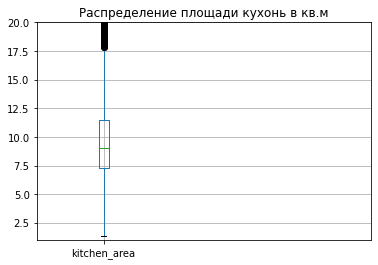

In [29]:
#построим диаграмму размаха для площади кухни
plt.ylim(1,20)
plt.xlim(0, 5) 
data_kitchen = data1[['kitchen_area']]
data_kitchen.boxplot(figsize=(15, 20))
plt.title('Распределение площади кухонь в кв.м')
plt.show()

получается что значения площади кухонь распределены от 1,3 до 18 метров. Пик приходится на 8,5 метров - с учетом студий - может быть

In [30]:
#и информацию о таблице
data1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23643 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23643 non-null  int64  
 1   last_price            23643 non-null  float64
 2   total_area            23643 non-null  float64
 3   first_day_exposition  23643 non-null  object 
 4   rooms                 23643 non-null  int64  
 5   ceiling_height        14486 non-null  float64
 6   floors_total          23640 non-null  float64
 7   living_area           23643 non-null  float64
 8   floor                 23643 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23643 non-null  bool   
 11  open_plan             23643 non-null  bool   
 12  kitchen_area          23437 non-null  float64
 13  balcony               12135 non-null  float64
 14  locality_name         23643 non-null  object 
 15  airports_nearest   

так, а что это за 208 пропусков,которые остались после замены? смотрим инфо по нашей таблице. О! так ведь это же студии! у них по определению нет кухонь. Встает вопрос как их заполнять и как учитывать? Примем площадь кухни в студиях 5 метров - по нормативам в студиях площадь кухни считается 5-6 метров. 


In [31]:
# создаем столбец с площадью кухни-столовой
data1['dinning_area'] = data1.loc[(data1['rooms'] == 0),'living_area']
data1.loc[(data1['rooms'] == 0), 'kitchen_area'] = 5
data_studio = data1.loc[(data1['rooms'] == 0)]
# выводим на экран, проверяем что получилось
data_studio[['rooms', 'living_area','kitchen_area', 'dinning_area', 'total_area']].head(10)
#data.tail(60)


rooms  living_area  kitchen_area  dinning_area  total_area
144      0        15.50           5.0         15.50       27.00
349      0        17.00           5.0         17.00       25.00
440      0        24.75           5.0         24.75       27.11
508      0        24.30           5.0         24.30       34.40
608      0        18.00           5.0         18.00       25.00
697      0        17.50           5.0         17.50       24.10
716      0        12.00           5.0         12.00       17.00
780      0        18.00           5.0         18.00       26.10
839      0        15.00           5.0         15.00       35.00
946      0        18.00           5.0         18.00       23.00

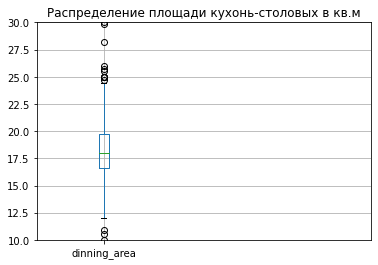

In [32]:
# построим диаграмму размаха для кухонь-столовых
plt.ylim(10,30)
plt.xlim(0, 5) 
data_dinning = data1[['dinning_area']]
data_dinning.boxplot(figsize=(15, 20)) 

plt.title('Распределение площади кухонь-столовых в кв.м')
plt.show()

получается что кухни-столовые значения распределены от 10,5 до 25 метров. Пик приходится на 18метров - вполне реальная картина

In [33]:
data1.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23643.000000  2.364300e+04  23643.000000  23643.000000    14486.000000   
mean       9.861862  6.539228e+06     60.330622      2.069788        2.771286   
std        5.682141  1.089129e+07     35.660770      1.079154        1.261762   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.799000e+06     69.700000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23640.000000  23643.000000  23643.000000  23643.000000  12135.000000   
mean      10.674196     34.322934      5.892526     10.412979      1.152946   
std        6.592387     21.706340      4.882071      5.661312      1.071228   
min        1.000000      6.500000      1.000000      1.300000      0.000000   
25%        5.000000     18.400000      2.000000      7.200000      0.000000   
50%        9.000000     30.300000      4.000000      9.000000      1.000000   
75%       16.000000     42.700000      8.000000     11.500000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18110.000000         18133.000000      18134.000000    8060.000000   
mean       28803.424075         14199.620195          0.611558     490.766749   
std        12639.030736          8607.514413          0.802089     342.612183   
min            0.000000           181.000000          0.000000       1.000000   
25%        18574.250000          9241.000000          0.000000     287.750000   
50%        26755.500000         13107.000000          0.000000     454.000000   
75%        37306.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  dinning_area  
count      18134.000000    9082.000000     20463.000000    206.000000  
mean           0.769659     518.036776       180.769877     18.968738  
std            0.937902     277.801084       219.808103      6.101819  
min            0.000000      13.000000         1.000000     10.000000  
25%            0.000000     293.250000        45.000000     16.600000  
50%            1.000000     502.000000        95.000000     18.000000  
75%            1.000000     730.000000       231.000000     19.750000  
max            3.000000    1344.000000      1580.000000     68.000000

Странная минимальная площадь кухни в 1,3 метра - просто каморка папы Карло какая-то и максимальная площадь кухни 112 метров, хм - спортивный зал для бальных танцев - это 50 метров... а тут 112! даже по кухне 25 метров за день можно набегать несколько километров - или там не одна кухня или это подпольный ресторан на дому или это просто выброс. Построим гистограмму

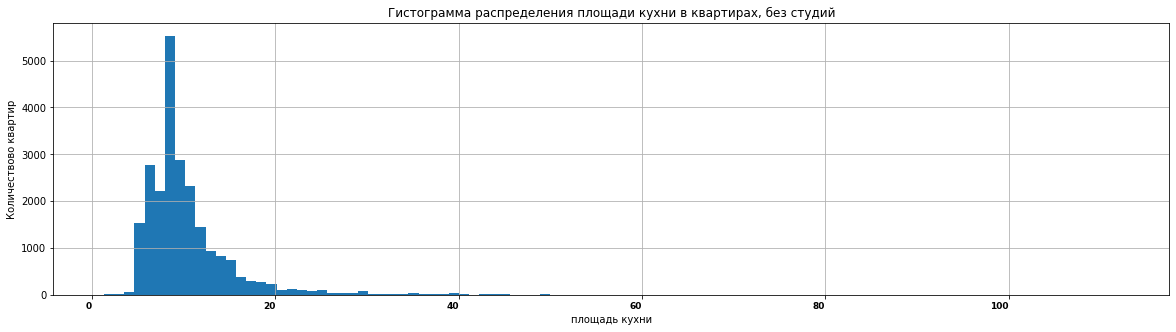

In [34]:
data_flats = data1.loc[(data1['studio']== False)]
#гистограмма площади кухни в квартирах, без студий
data_flats['kitchen_area'].hist(bins=100, figsize=(20, 5)) 
plt.xlabel('площадь кухни')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения площади кухни в квартирах, без студий')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.show()

площади кухни только в квартирах(без студий) пик на 8 метрах, разброс основных значений от 5-ти до 25 метров

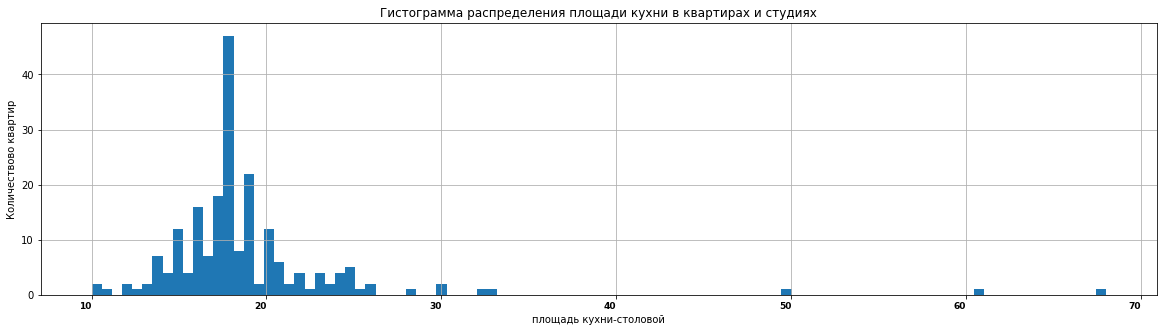

In [35]:
#гистограмма по площадям кухонь-столовых
data1['dinning_area'].hist(bins=100, figsize=(20, 5)) 
plt.xlabel('площадь кухни-столовой')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения площади кухни в квартирах и студиях')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.show()

гистограмма по площадям кухонь-столовых: пик на 18 метров, разброс основных значений от 10-ти до 26 метров

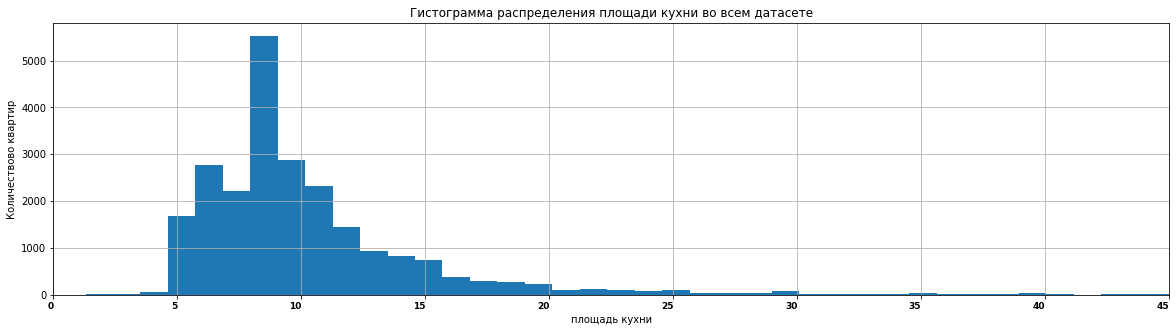

In [36]:
#гистограмма кухонь во всем массиве данных
data1['kitchen_area'].hist(bins=100, figsize=(20, 5)) 
plt.xlabel('площадь кухни')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения площади кухни во всем датасете')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(0, 45)
plt.show()

гистограмма кухонь во всем массиве данных: пик на 8,5 метров, разброс от 5-ти до 26 кв метров

основная часть значений столбца 'kitchen_area' лежит в диапазоне от 4-х до 30 метров. Будем считать от 26-ти метров и выше выбросами и до 4-х метров тоже аномалиями. Медианное значение приходится на примерно 8,5 квадратных метров

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23643 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23643 non-null  int64  
 1   last_price            23643 non-null  float64
 2   total_area            23643 non-null  float64
 3   first_day_exposition  23643 non-null  object 
 4   rooms                 23643 non-null  int64  
 5   ceiling_height        14486 non-null  float64
 6   floors_total          23640 non-null  float64
 7   living_area           23643 non-null  float64
 8   floor                 23643 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23643 non-null  bool   
 11  open_plan             23643 non-null  bool   
 12  kitchen_area          23643 non-null  float64
 13  balcony               12135 non-null  float64
 14  locality_name         23643 non-null  object 
 15  airports_nearest   

In [38]:
# выделим квартиры с маленькими кухнями в отдельный датасет
data_small_kitchen = data1[data1['kitchen_area']<4]
print(len(data_small_kitchen[['kitchen_area','studio']]), ' - количество студий с аномально маленькими кухнями')
data_small_kitchen.info()
data_small_kitchen[['studio']].value_counts()

29  - количество студий с аномально маленькими кухнями
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 906 to 23498
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          29 non-null     int64  
 1   last_price            29 non-null     float64
 2   total_area            29 non-null     float64
 3   first_day_exposition  29 non-null     object 
 4   rooms                 29 non-null     int64  
 5   ceiling_height        19 non-null     float64
 6   floors_total          29 non-null     float64
 7   living_area           29 non-null     float64
 8   floor                 29 non-null     int64  
 9   is_apartment          3 non-null      object 
 10  studio                29 non-null     bool   
 11  open_plan             29 non-null     bool   
 12  kitchen_area          29 non-null     float64
 13  balcony               11 non-null     float64
 14  locality_name   

studio
False     29
dtype: int64

мы проверили - есть ли среди квартир с маленькими кухнями студии? нет ни одной! здорово - 29 квартир в аномально маленькими кухнями для массива с 23699 записями - это 0,1% - не страшно потерять.
Хотя, если рассуждать еще - выведя количество комнат - получается что просто продавцы квартир занизили стандартный размер кухни и указали размер поднутрения в студии, который предназначен для кухонного уголка. если предположить что суммарная площадь (кухня плюс жилая) константа, то можно скорректировать эти данные тоже. Однако, площади кухни тогда будет для всех студий одинакова 5 метров квадратных, и исследовать зависимость стоимости студий от величины кухни будет не корректно. Лучше было бы сравнить по размеру кухни-столовой. Но, в случае с количеством комнат 2 - непонятно как вычленить размер кухни столовой.

Чтобы не вдаваться в дебри рассуждений все-таки будем считать слишком маленькие кухни выбросами 

Теперь посмотрим большие кухни:

In [39]:
# выделим квартиры с большими кухнями в отдельный датасет
data_big_kitchen = data1[data1['kitchen_area']>26]
percent_big_kitchen = len(data_big_kitchen)*100/23650
print(len(data_big_kitchen), ' - количество больших кухонь в выборке ', round(percent_big_kitchen, 1), '%')

498  - количество больших кухонь в выборке  2.1 %


In [40]:
# проверим есть ли среди них открытые планировки
data_big_kitchen[data_big_kitchen['open_plan']==True]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, dinning_area]
Index: []

[0 rows x 23 columns]

In [41]:
# проверим есть ли среди них апартаменты и выведем основные столбцы больших кухонь в апартаментах на экран
data_big_kitch_apa = data_big_kitchen[data_big_kitchen['is_apartment']==True]
data_big_kitch_apa[['kitchen_area', 'total_area', 'living_area', 'rooms']]

kitchen_area  total_area  living_area  rooms
5297           45.0        96.0         30.5      2
5654           32.0       116.0         68.0      3
6523           31.0        82.0         30.0      2
8018           45.5       507.0        301.5      5
10867          87.2       177.9         87.2      3
22560          28.0        98.0         45.0      3

2,1% данных - это не большая потеря, можно пожертвовать этими данными. Часть квартир является апартаментами (6 квартир). Предположим, что подающие объявление о квартире лукавили и указывали большие кухни для улучшения положения объявления в поисковой выдаче. Ведь обычно - чем больше кухня, тем дороже квартира. Выведем на экран верх таблицы больших кухонь data_big_kitchen

In [42]:
# выведем большие кухни на экран
data_big_kitchen[['is_apartment', 'rooms', 'kitchen_area', 'studio', 'open_plan', 'living_area', 
                  'total_area']].sort_values(by='living_area').head(10)

is_apartment  rooms  kitchen_area  studio  open_plan  living_area  \
20994          NaN      2          31.0   False      False          8.0   
2309           NaN      2          41.0   False      False          8.4   
1326           NaN      2          32.0   False      False          9.0   
16034          NaN      2          30.0   False      False         10.5   
2154           NaN      1          27.4   False      False         11.4   
511            NaN      1          50.0   False      False         13.0   
4074           NaN      1          30.5   False      False         13.3   
19367          NaN      2          28.3   False      False         14.9   
1378           NaN      2          27.0   False      False         15.0   
7498           NaN      2          30.0   False      False         16.0   

       total_area  
20994        50.6  
2309         62.4  
1326         52.0  
16034        60.2  
2154         56.3  
511          69.0  
4074         56.6  
19367        47.6  
1378         58.5  
7498         54.0

Получается, что комната условно 11 метров, а кухня 27 и написано что 1 комната - однозначно это евродвушка с комнатой 11 метрой и кухней-столовой 27 метров. Выведем на экран данные для квартир с большими кухнями (жилаяплощадь, площадь кухни, столбцы студия и свободная планировка, столбец кухня столовая и посмотрим как обстоят дела

в массиве больших кухонь (размер более 18 кв. метров) - нет ни студий ни открытых планировок. предположим, что те квартиры у которых жилая площадь меньше чем площадь кухни и это не апартаменты - это так называемые евро-двушки, трешки и т.д.

Тогда разумно присвоить этим строкам в основной таблице data1 в столбце studio True.
Выведем на экран что получилось

In [43]:
# присвоим строкам в основной таблице data1 в столбце studio True
data1.loc[((data1['kitchen_area'] > 26) & (data1['kitchen_area'] > data1['living_area']) 
           & (data1['is_apartment']==False)), 'studio'] = True

Есть несколько вариантов действий дальше:

1). создать дополнительный столбец и назвать его dinning_area - площадь столовой и перенести туда площадь кухни таких квартир, при этом площадь кухни оставить прежней, количество комнат оставить прежним.

2). или изменить жилую площадь - площадь кухни оставить 5 метров, а жилая увеличится на (разницу площадь кухни - 5 метров), 
и количество комнат увеличить на единицу.  
3). Можно вычесть из общей площади жилую. Но стоит помнить, что в "не жилую площадь" входят также коридоры, кладовки и санузлы.
    
4). Не восстанавливать пропуски.

у первых трех вариантов есть недостатки - в первом случае мы будем сравнивать стоимость квартир в соответствии с количеством комнат - а однушка и евро-двушка не одно и то же.
Во втором варианте - мы упрощаем площадь всех студий вне зависимости от количества комнат до 5 метров квадратных и это тоже негативно отразится на нашем исследовании влияния площади кухонь на стоимость квартир.

Пэтому принимаем решение далее не заполнять пропуски и оставить данные так "как есть".

In [44]:
# группируем значения студий по количеству комнат и считаем их
data_studio = data1[['rooms', 'studio']]
data_studio = data_studio[data_studio['studio'] == True]
data_studio['rooms'].unique()
data_studio.groupby('rooms')['studio'].count()

rooms
0    147
2     10
3      4
Name: studio, dtype: int64

In [45]:
len(data1['kitchen_area'])
data1['kitchen_area'].isna().sum()

0

получилось что формат евро распределен среди 0-комнатных студий -147, евродвушек - 9, евротрешек - 11, еврочетырёшек(забавно звучит) - 4 , пропусков нет

In [46]:
# убираем аномалии в площади кухонь
data2 = data1[((data1['kitchen_area'] >= 4)  & (data1['kitchen_area'] <= 26))]
data2 = data2.reset_index()
data2.info()
data2.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23116 non-null  int64  
 1   total_images          23116 non-null  int64  
 2   last_price            23116 non-null  float64
 3   total_area            23116 non-null  float64
 4   first_day_exposition  23116 non-null  object 
 5   rooms                 23116 non-null  int64  
 6   ceiling_height        14125 non-null  float64
 7   floors_total          23113 non-null  float64
 8   living_area           23116 non-null  float64
 9   floor                 23116 non-null  int64  
 10  is_apartment          2696 non-null   object 
 11  studio                23116 non-null  bool   
 12  open_plan             23116 non-null  bool   
 13  kitchen_area          23116 non-null  float64
 14  balcony               11903 non-null  float64
 15  locality_name      

index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8991
floors_total                3
living_area                 0
floor                       0
is_apartment            20420
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11213
locality_name               0
airports_nearest         5500
cityCenters_nearest      5478
parks_around3000         5477
parks_nearest           15356
ponds_around3000         5477
ponds_nearest           14351
days_exposition          3046
dinning_area            22910
dtype: int64

#### Вывод:   
Мы рассмотрели распределение площадей кухни в соответствии с количеством комнат и критерием "студия", "открытая планировка" и "апартаменты". Выяснилось, что при заполнении этой информации царит полная анархия: площадь кухни в студии как преуменьшают чтобы жилая площадь была больше, так и преувеличивают чтобы люди выбирали квартиру по метражу большой кухни. В датасете нет четких критериев для определения площади кухни в кваритрах формата "евро". По закону в евростудиях площадь кухни должна быть 5-6 метров вне зависимости от метража кухни-столовой. Поэтому рекомендовано ввести формат "евро" в объявления о квартире и установить там размер не кухни, а кухни-столовой, обозначив в поисковой выдаче возможность выбора между кухней и кухней-столовой или, в случае если клиент не делает такой выбор принудительно задать размер кухни в кухне-столовой в размере 5 кв. метров.  
Пропуски мы заполнили медианными значаниями для n-комнатных квартир, для евро-студий (0 комнат) - 5 метров.
Кроме того му убрали выбросы меньше 4-х и больше 26-ти кв метров кухни и потеряли при этом 527 строк, это 2,2% данных

<a id='step_2.4'></a><h3>2.4 Высота потолков, привести в соответствие от 2,5 до 5 метров (в Питере бывают квартиры с высокими потолками), если аномалии останутся - проверить сколько их и решить - избавляться от них или еще раз править</h3>   

[К оглавлению](#step_0)   

Теперь высота потолков - заменяем пропуски:
заменяем пустые значения высоты потолков и расстояние до центра на среднее по населенному пункту.  

In [47]:
#заменяем пустые значения высоты потолков на среднее по населенному пункту
locality_name_uniq = data2['locality_name'].unique()#находим уникальные населенные пункты
for punct in locality_name_uniq:
    #находим среднее для потолка по конкретному населенному пункту
    ceiling_height_mean = data2[data2['locality_name'] == punct]['ceiling_height'].mean()
    #меняем значения
    data2.loc[(data2['locality_name'] == punct) & (data2['ceiling_height'].isna()), 'ceiling_height'] = ceiling_height_mean 
print('пустых значений ceiling_height:', data2['ceiling_height'].isna().sum())

пустых значений ceiling_height: 100


Для 100 строк не удалось определить высоту потолка, т.к. в объявлениях населенных пунктов по которым считалось среднее 
значение не указана высота потолка, для них заменим на среднее по всем населенным пунктам, кроме Санкт-Петербурга (в нем 
есть дома с очень высокими потолками)
находим среднее для потолка по всем населенным пунктам кроме Спб

In [48]:
#для 100 строк не удалось определить высоту потолка, т.к. в объявлениях населенных пунктов по которым считалось среднее 
#значение не указана высота потолка, для них заменим на среднее по всем населенным пунктам, кроме Санкт-Петербурга (в нем 
#есть дома с очень высокими потолками)
#находим среднее для потолка по всем населенным пунктам кроме Спб
ceiling_height_mean = data2[data2['locality_name'] != 'Санкт-Петербург']['ceiling_height'].mean()
data2['ceiling_height'] = data2['ceiling_height'].fillna(ceiling_height_mean) #меняем значения
print('пустых значений ceiling_height после замены : ', data2['ceiling_height'].isna().sum()) #проверка

пустых значений ceiling_height после замены :  0


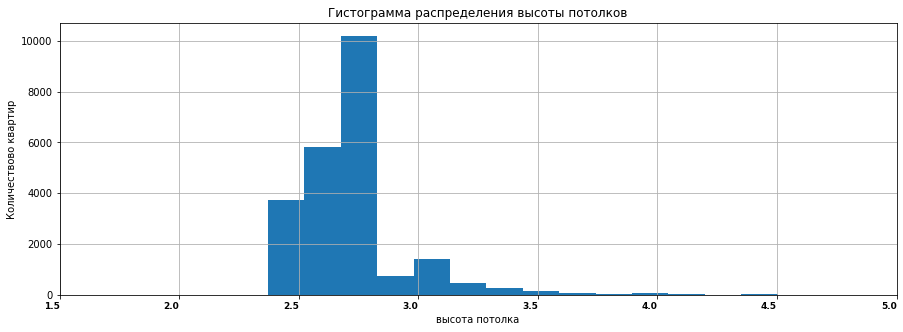

In [49]:
#гистограмма высоты потолков в во всем массиве данных
data2['ceiling_height'].hist(bins=650, figsize=(15, 5))
plt.xlabel('высота потолка')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения высоты потолков')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(1.5,5)
plt.show()

сплошная неоднородность

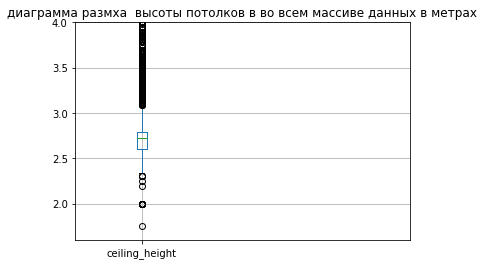

In [50]:
#диаграмма размха  высоты потолков в во всем массиве данных
plt.ylim(1.6,4)
plt.xlim(0, 5) 
data3 = data2[['ceiling_height']]
data3.boxplot(figsize=(1.5, 2))
plt.title('диаграмма размха  высоты потолков в во всем массиве данных в метрах')
plt.show()

In [51]:
# проверяем количество аномалий в высоте потолков
data_ceiling_height_max = data2[data2['ceiling_height']>4.5]
data_ceiling_height_min = data2[data2['ceiling_height']<2.3]
ceiling_loss = (len(data_ceiling_height_max)+len(data_ceiling_height_min))*100/23699
print('количество потеряных данных из-за ограничение высоты потолка - ', round(ceiling_loss, 2), '%, (', \
      (len(data_ceiling_height_max)+len(data_ceiling_height_min)), ')')
data3 =  data2[(data2['ceiling_height']<=4.5) & (data2['ceiling_height']>=2.3)]


количество потеряных данных из-за ограничение высоты потолка -  0.25 %, ( 60 )


#### Вывод:    
среднее значение высоты потолков 2.75, разброс от 2.4 до 4 метров, возьмем верхний потолок высоты 4.5 м с учетом квартир в СПб т.к. в этом направлении больше выбросов.  
0,25% выбросов это не плохо, это всего 60 строк, мы их удалили.

<a id='step_2.5'></a><h3>2.5 исследуем расстояние до центра города cityCenters_nearest, удалим пропуски, заменим на адекватные значения</h3>   

[К оглавлению](#step_0)   

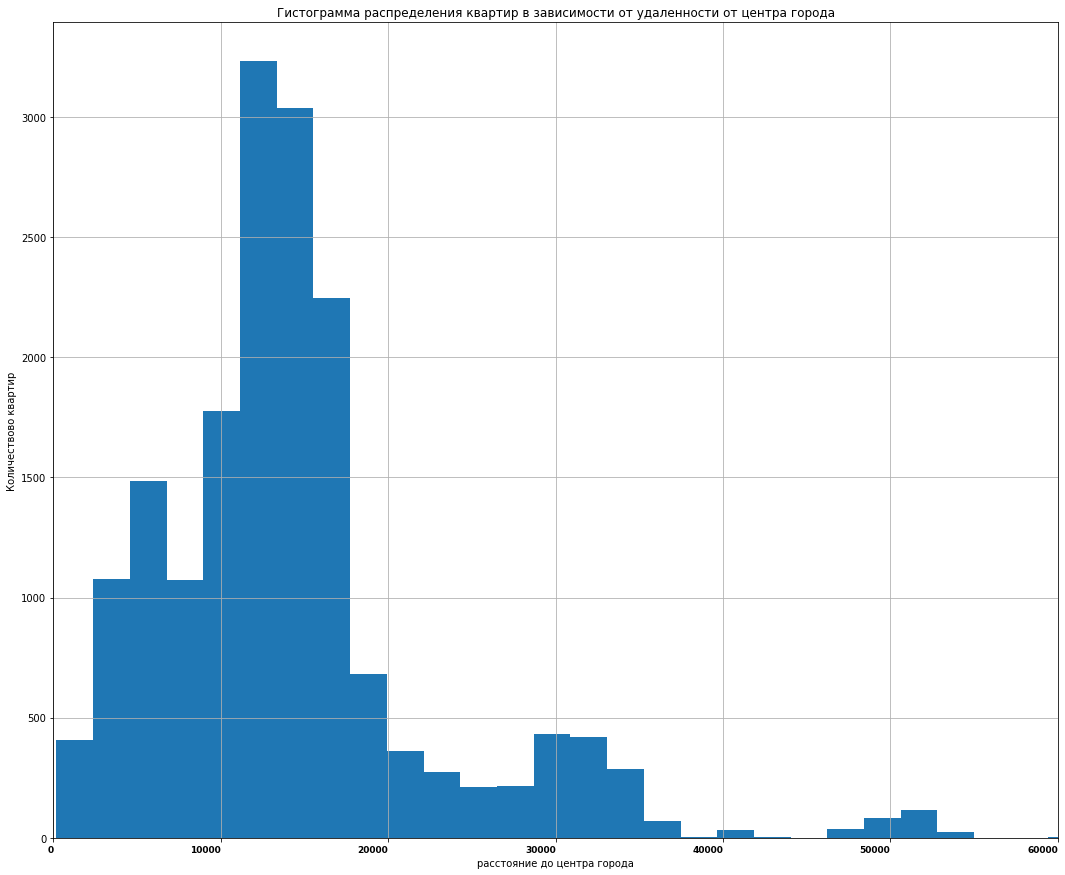

In [52]:
#гистограмма расстояния до центра города 
data3['cityCenters_nearest'].hist(bins=30, figsize=(18, 15)) 
plt.xlabel('расстояние до центра города')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения квартир в зависимости от удаленности от центра города')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(0,60000)
plt.show()

Теперь расстояние до центра - заменяем пропуски:
заменяем пустые значения расстояния до центра на среднее по населенному пункту.  

In [53]:
#среднее растояние до центра СПБ
nearestMeanSpb = data3[data3['locality_name'] == 'санкт-петербург']['cityCenters_nearest'].mean()
#список уникальных населенных пунктов
locality_name_uniq = data3['locality_name'].unique()
#список населенных пунктов, в которых нет значений
listlocalityNan=[]
for punct in locality_name_uniq:
    #среднее значение в населенном пункте elem из locality_name_uniq
    q1=0
    # если населенный пункт - не СПб
    if punct != 'санкт-петербург':
        #среднее значение до центра города подсчитываем
        q1 = data3.loc[(data3['locality_name'] == punct),'cityCenters_nearest'].mean()
        #если среднее значение до центра города больше чем среднее расстояние до СПБ, 
        #значит это расстояние не до центра города, а расстояние до центра СПб, 
        #потому что городов больше чем СПб в Ленинградской области нет
        if q1 > nearestMeanSpb:
            # заполняем список населенных пунктов, в которых были пропуски и которые являются пригородами СПБ
            listlocalityNan.append(punct)
            #меняем значения
            data3.loc[data3['locality_name'] == punct, 'cityCenters_nearest'] = data3['cityCenters_nearest'].fillna(q1) 
        #иначе, то есть среднее расстояние до центра меньше чем среднее до центра СПБ, 
        #считаем такой город малым и заменяем его на среднее расстояние до центра равное 3 км
        
        data3['cityCenters_nearest'] = data3['cityCenters_nearest'].fillna(3000)
    #если населенный пункт СПб и в нем есть NaN - меняем на среднее значение до центра города СПб        
    else:
        data3['cityCenters_nearest'] = data3['cityCenters_nearest'].fillna(nearestMeanSpb)             
print(data3.info())
print(listlocalityNan)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23056 entries, 0 to 23115
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23056 non-null  int64  
 1   total_images          23056 non-null  int64  
 2   last_price            23056 non-null  float64
 3   total_area            23056 non-null  float64
 4   first_day_exposition  23056 non-null  object 
 5   rooms                 23056 non-null  int64  
 6   ceiling_height        23056 non-null  float64
 7   floors_total          23053 non-null  float64
 8   living_area           23056 non-null  float64
 9   floor                 23056 non-null  int64  
 10  is_apartment          2680 non-null   object 
 11  studio                23056 non-null  bool   
 12  open_plan             23056 non-null  bool   
 13  kitchen_area          23056 non-null  float64
 14  balcony               11869 non-null  float64
 15  locality_name      

In [54]:
# среднее расстояние до центра города в городах Ленинградской области кроме СПб
q1 = data3.loc[(data3['locality_name'] != 'санкт-петербург'),'cityCenters_nearest'].mean()
print(round(q1/1000,2), 'среднее расстояние до центра города не в СПб, км')

17.6 среднее расстояние до центра города не в СПб, км


так как в списке городов малые и средние города Ленинградской области, то если брать среднее расстояние от центра 17,6 км - то в таком случае площадь этих городов в среднем должна составлять 972 кв километра, а это город размером с Абу-Даби или чуть меньше Екатеринбурга. Следовательно в объявлениях указано расстояние до центра Санкт-Петербурга, поэтому замена на среднее расстояние от центра в малых городах не корректна, заменим на расстояние от центра = 3 км.

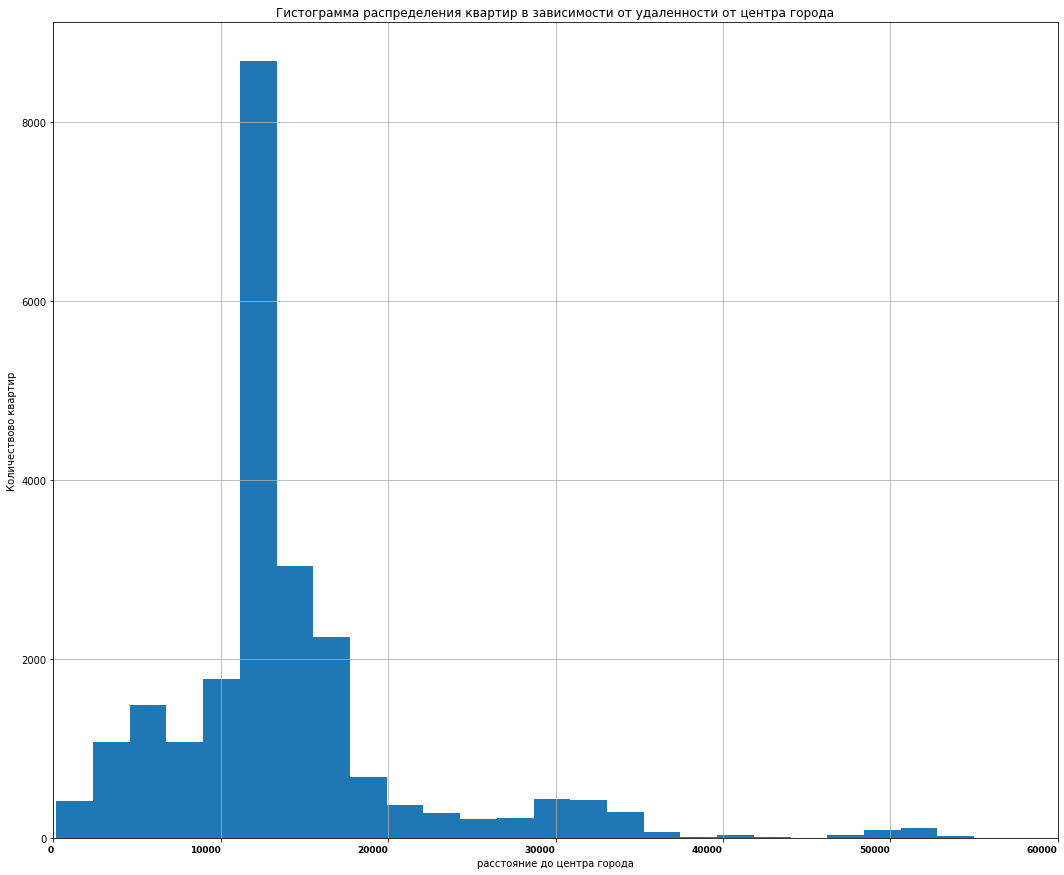

In [55]:
 #гистограмма расстояния до центра города
data3['cityCenters_nearest'].hist(bins=30, figsize=(18, 15)) 
plt.xlabel('расстояние до центра города')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения квартир в зависимости от удаленности от центра города')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(0,60000)
plt.show()

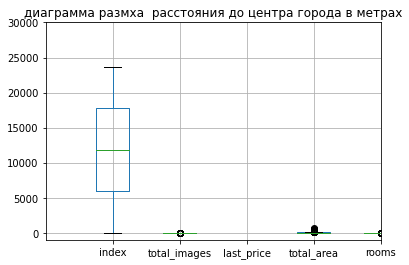

In [56]:
#диаграмма размха  расстояния до центра города
plt.ylim(-1000,30000)
plt.xlim(0, 5) 
data4 = data3[['cityCenters_nearest']]
data3.boxplot(figsize=(10, 20))
plt.title('диаграмма размха  расстояния до центра города в метрах')
plt.show()

#### Вывод:
мы видим 3 пика на гистограммах (до и после замены на среднее значение пропусков) - это в районе 5000 м, 11000 и 30000 м. на мой взгляд, ситуация объясняется так: Макимальный пик на 11000 - это среднее расстояние до центра СПБ включая замены пропусков на среднее значение. Пик около 5 км - это малые города, 30 км- это расстояние до центра СПБ городов сателлитов. Так как там активно ведется строительство и также активно продаются квартиры, их позиционируют как пригород СПб, а километраж ставят до центра СПБ.  
Диаграмма размаха дает похожую картину - медиана около 11000м, рузброс усов от 5000 до 21000м. Квартили - от 10500 до 15500м.  
Рекомендовано для автоматизации сервиса подачи объявлений создать перечень городов-сателитов Санкт-Петербурга, при указании которых система не даст указать расстояние до центра города больше чем максимальное расстояние между точками в самом городе. Кроме того можно создать необязательную опцию "расстояние до центра Санкт-Петербурга", чтобы подающий объявление мог ей воспользоваться.  

<a id='step_2.6'></a><h3>2.6 Построим гистограмму расстояния до аэропорта - определим какая часть квартир находится в непосредственной близости? То же самое с расстоянием до водоема и до парка</h3>   

[К оглавлению](#step_0)    

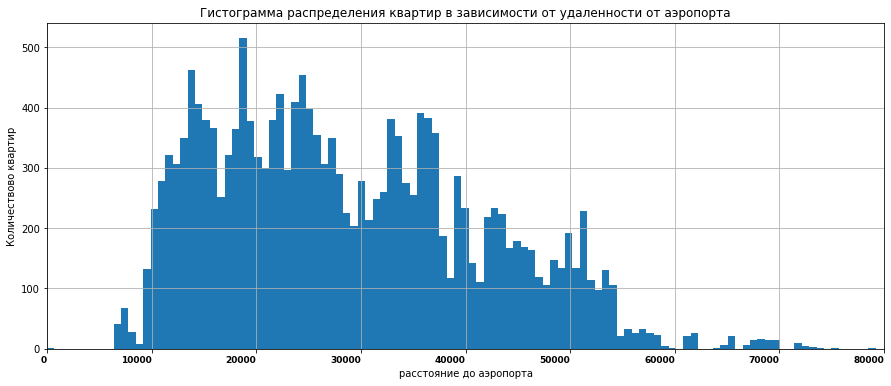

In [57]:
 #гистограмма расстояния до аэропорта во всем массиве данных
data3['airports_nearest'].hist(bins=120, figsize=(15, 6))
plt.xlabel('расстояние до аэропорта')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения квартир в зависимости от удаленности от аэропорта')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(0,80000)
plt.show()

Похожа на распределение Гаусса, пик в районе 19000 м, размах от 700 до 70000 м. Аэропортов в Ленинградской области не много, поэтому расстояние до аэропорта во многих населенных пунктах - большое. 

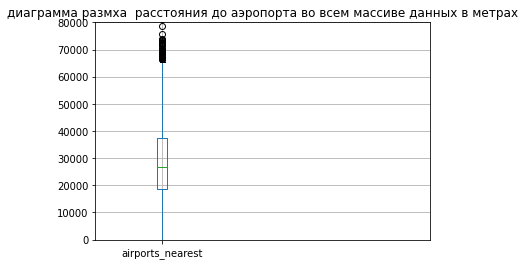

In [58]:
#диаграмма размаха расстояния до аэропорта во всем массиве данных
plt.ylim(-100,80000)
plt.xlim(0, 5) 
data5 = data3[['airports_nearest']]
data5.boxplot(figsize=(15, 20))
plt.title('диаграмма размха  расстояния до аэропорта во всем массиве данных в метрах')
plt.show()

In [59]:
#среднее растояние до аэропорта
nearestMeanSpb_air = data3[data3['locality_name'] == 'санкт-петербург']['airports_nearest'].median()
#список уникальных населенных пунктов
locality_name_uniq = data3['locality_name'].unique()
#список населенных пунктов, в которых нет значений
listlocalityNan=[]
for punct in locality_name_uniq:
    #среднее значение в населенном пункте elem из locality_name_uniq
    q1=0
    # если населенный пункт - не СПб
    if punct != 'санкт-петербург':
        #среднее значение до аэропорта подсчитываем
        q1 = data3.loc[(data3['locality_name'] == punct),'airports_nearest'].mean()
    else:
            #меняем значения в СПб
        data3.loc[data3['locality_name'] == punct, 'airports_nearest'] = data3['airports_nearest'].fillna(nearestMeanSpb_air) 
        
        
print(data3.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23056 entries, 0 to 23115
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23056 non-null  int64  
 1   total_images          23056 non-null  int64  
 2   last_price            23056 non-null  float64
 3   total_area            23056 non-null  float64
 4   first_day_exposition  23056 non-null  object 
 5   rooms                 23056 non-null  int64  
 6   ceiling_height        23056 non-null  float64
 7   floors_total          23053 non-null  float64
 8   living_area           23056 non-null  float64
 9   floor                 23056 non-null  int64  
 10  is_apartment          2680 non-null   object 
 11  studio                23056 non-null  bool   
 12  open_plan             23056 non-null  bool   
 13  kitchen_area          23056 non-null  float64
 14  balcony               11869 non-null  float64
 15  locality_name      

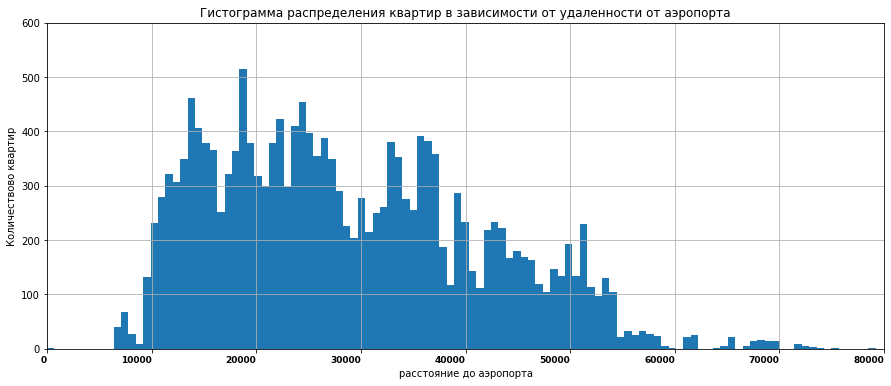

In [60]:
 #гистограмма расстояния до аэропорта во всем массиве данных
data3['airports_nearest'].hist(bins=120, figsize=(15, 6))
plt.xlabel('расстояние до аэропорта')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения квартир в зависимости от удаленности от аэропорта')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(0,80000)
plt.ylim(0,600)
plt.show()

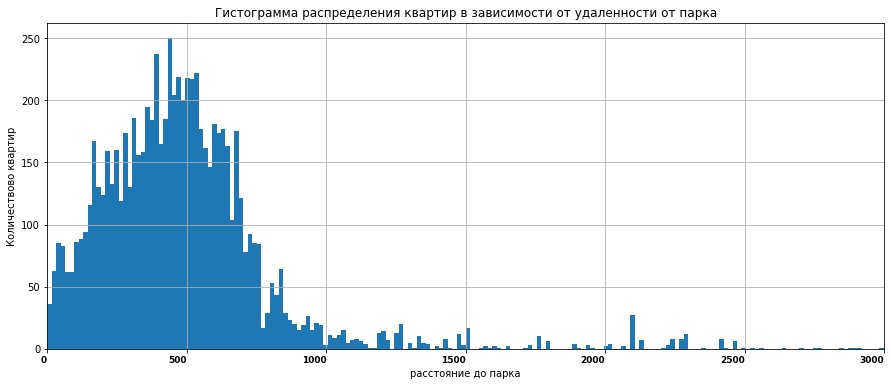

In [61]:
#гистограмма расстояния до парка в во всем массиве данныхи
data3['parks_nearest'].hist(bins=200, figsize=(15, 6)) 
plt.xlabel('расстояние до парка')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения квартир в зависимости от удаленности от парка')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(0,3000)
plt.show()

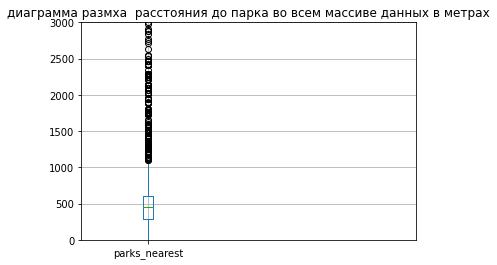

In [62]:
#диаграмма размаха расстояния до парка во всем массиве данных
plt.ylim(0,3000)
plt.xlim(0, 5) 
data6 = data3[['parks_nearest']]
data6.boxplot(figsize=(15, 20))
plt.title('диаграмма размха  расстояния до парка во всем массиве данных в метрах')
plt.show()

Похожа на нормальное распределение, пик в районе 490 м, размах от 0 до 1500 м. Лесов на Севере России много в Ленинградской области тем более, поэтому расстояние до парков и лесов во многих населенных пунктах - не большое, можно белок прямо с балкона кормить. 

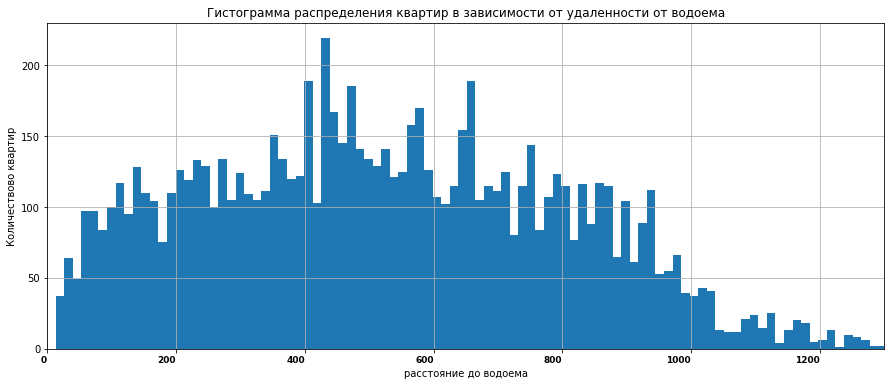

In [63]:
#гистограмма расстояния до водоема в во всем массиве данныхи
data3['ponds_nearest'].hist(bins=100, figsize=(15, 6)) 
plt.xlabel('расстояние до водоема')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения квартир в зависимости от удаленности от водоема')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(0,1300)
plt.show()

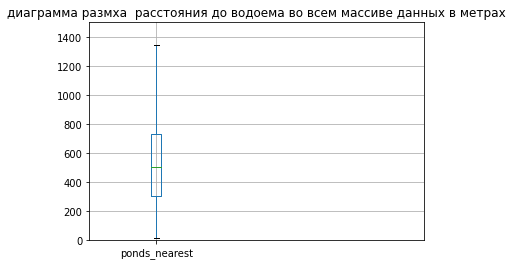

In [64]:
#диаграмма размаха расстояния до водоема во всем массиве данных
plt.ylim(0,1500)
plt.xlim(0, 5) 
data7 = data3[['ponds_nearest']]
data7.boxplot(figsize=(15, 20))
plt.title('диаграмма размха  расстояния до водоема во всем массиве данных в метрах')
plt.show()

#### Выводы:
Ладога, Финский залив, сеть рек и озер в Ленинградской области способствуют не только рыбалке, но и жилищному строительству с видом на воду, одних только набережных в СПб сколько! Поэтому пик значений по гистограмме до воды 420 м, минимум - 13, разброс до 1300.  
По диаграмме размаха - медиана - 500м, усы от 0 до 1350м, квартили - от 300 до 720.  
По закону жилищние строительство запрещено ближе 500 м от водоема. в Москве - 300м, предположим, что в СПб тоже 300м, исключение рекомендуется сделать для самого Санкт-Петербурга и исторических пригородов. В остальных случаях система должна предупреждать о мошеннических действиях, либо верифицировать с картографической информацией.

<a id='step_2.7'></a><h3>2.7 заменим пропуски в столбцах аппатраменты, балконы и кухни-столовые</h3>   

[К оглавлению](#step_0)   


In [65]:
data3['is_apartment'].unique()

array([nan, False, True], dtype=object)

Столбец 'is appartment' содержит пропуски NaN, выведя уникальные значения этого столбца - мы видим, что он должен был быть булевым, но, поскольку там есть пропуски,то он стал типа object. Принципиального значения аппартаменты на наше исследование не имеют, заменим "на всякий случай", чем больше адекватных данных мы сохраним, тем точнее будет исследование

In [66]:
data3['is_apartment'] = data3['is_apartment'].isna().fillna(False)
data3.isna().sum()
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23056 entries, 0 to 23115
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23056 non-null  int64  
 1   total_images          23056 non-null  int64  
 2   last_price            23056 non-null  float64
 3   total_area            23056 non-null  float64
 4   first_day_exposition  23056 non-null  object 
 5   rooms                 23056 non-null  int64  
 6   ceiling_height        23056 non-null  float64
 7   floors_total          23053 non-null  float64
 8   living_area           23056 non-null  float64
 9   floor                 23056 non-null  int64  
 10  is_apartment          23056 non-null  bool   
 11  studio                23056 non-null  bool   
 12  open_plan             23056 non-null  bool   
 13  kitchen_area          23056 non-null  float64
 14  balcony               11869 non-null  float64
 15  locality_name      

на всякий случай заменим значения NaN в столбце 'is_apartment' на False, вызвав info(), убеждаемся что столбец стал булевым

In [67]:
data3['balcony'] = data3['balcony'].fillna(0)
print(data3['balcony'].unique())#список уникальных количеств балконов
#data['balcony'].isna().sum()
data3.info()


[0. 2. 1. 5. 4. 3.]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23056 entries, 0 to 23115
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23056 non-null  int64  
 1   total_images          23056 non-null  int64  
 2   last_price            23056 non-null  float64
 3   total_area            23056 non-null  float64
 4   first_day_exposition  23056 non-null  object 
 5   rooms                 23056 non-null  int64  
 6   ceiling_height        23056 non-null  float64
 7   floors_total          23053 non-null  float64
 8   living_area           23056 non-null  float64
 9   floor                 23056 non-null  int64  
 10  is_apartment          23056 non-null  bool   
 11  studio                23056 non-null  bool   
 12  open_plan             23056 non-null  bool   
 13  kitchen_area          23056 non-null  float64
 14  balcony               23056 non-null  float64
 15 

In [68]:
#заменим все пропуски в столбце dinning_area на 0 - в обычных квартирах нет кухни-столовой как в евро-вариантах студий
data3['dinning_area'] = data3['dinning_area'].fillna(0)
data3.isna().sum()

index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                3
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5391
cityCenters_nearest         0
parks_around3000         5449
parks_nearest           15316
ponds_around3000         5449
ponds_nearest           14310
days_exposition          3036
dinning_area                0
dtype: int64

<a id='step_2.8'></a><h3>2.8 изменим тип данных в дате выставления объявления на числовой</h3>   

[К оглавлению](#step_0)   

first_day_exposition  23699 non-null  object - надо перевести в формат даты и времени

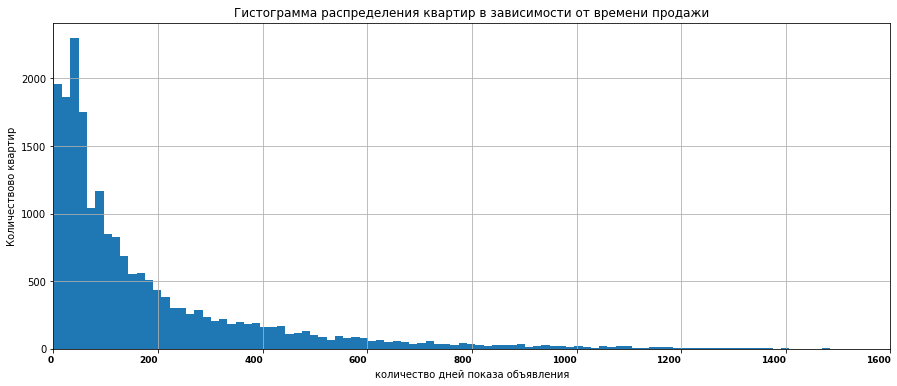

In [69]:
#гистограмма дней показа объявления
data3['days_exposition'].hist(bins=100, figsize=(15, 6)) 
plt.xlabel('количество дней показа объявления')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения квартир в зависимости от времени продажи')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(0,1600)
plt.show()

In [70]:
#приведение времени к типу данных datetime64[ns]
data3['first_day_exposition'] = pd.to_datetime(data3['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
display(data3.head())

print(data3.isna().sum())

index  total_images  last_price  total_area first_day_exposition  rooms  \
0      0            20  13000000.0       108.0           2019-03-07      3   
1      1             7   3350000.0        40.4           2018-12-04      1   
2      2            10   5196000.0        56.0           2015-08-20      2   
3      3             0  64900000.0       159.0           2015-07-24      3   
4      5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  ...  balcony  \
0        2.700000          16.0         51.0      8  ...      0.0   
1        2.644159          11.0         18.6      1  ...      2.0   
2        2.794964           5.0         34.3      4  ...      0.0   
3        2.794964          14.0         45.0      9  ...      0.0   
4        2.632759          12.0         14.4      5  ...      0.0   

               locality_name  airports_nearest  cityCenters_nearest  \
0            санкт-петербург           18863.0         16028.000000   
1             поселок шушары           12817.0         18603.000000   
2            санкт-петербург           21741.0         13933.000000   
3            санкт-петербург           28098.0          6800.000000   
4  городской поселок янино-1               NaN         11717.081234   

   parks_around3000 parks_nearest  ponds_around3000  ponds_nearest  \
0               1.0         482.0               2.0          755.0   
1               0.0           NaN               0.0            NaN   
2               1.0          90.0               2.0          574.0   
3               2.0          84.0               3.0          234.0   
4               NaN           NaN               NaN            NaN   

   days_exposition  dinning_area  
0              NaN           0.0  
1             81.0           0.0  
2            558.0           0.0  
3            424.0           0.0  
4             55.0           0.0  

[5 rows x 24 columns]

index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                3
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5391
cityCenters_nearest         0
parks_around3000         5449
parks_nearest           15316
ponds_around3000         5449
ponds_nearest           14310
days_exposition          3036
dinning_area                0
dtype: int64


In [71]:
date_max = '2000-03-07T00:00:00' 
last_day = '2019-05-14T00:00:00'

def make_last_day_exposition(row):
    try:
        return row['first_day_exposition'] + timedelta(days=row['days_exposition'])
    except:
        return row['first_day_exposition']

data3['last_day_exposition'] = data3.apply(make_last_day_exposition, axis=1)
display(data3.head())
display(last_day = data3['last_day_exposition'].max())
display(last_day)

days_exposition_max = 0
last_day = pd.to_datetime(last_day, format = '%Y-%m-%dT%H:%M:%S')
# присваиваем максимальную дату максимальному дню в выборке
date_max = pd.to_datetime(date_max, format = '%Y-%m-%dT%H:%M:%S')
# присваиваем минимальную дату максимальному дню в выборке
for datei2 in data3['days_exposition']: # перебираем все даты в столбце первого дня публикации
    if datei2 >= days_exposition_max: #если дата больше чем максимальный день в выборке
        days_exposition_max = datei2 #присваиваем максимальному дню выборки текущее значение столбца первого дня публикации
for datei in data3['first_day_exposition']: # перебираем все даты в столбце первого дня публикации
    if datei > date_max: #если дата больше чем максимальный день в выборке
        date_max = datei #присваиваем максимальному дню выборки текущее значение столбца первого дня публикации

print(data3.loc[data['first_day_exposition'] == date_max]) 
print(data3.loc[data['days_exposition'] == days_exposition_max]) 
print('Последняя дата публикации объявления',date_max, 'максимальный срок подачи объявления', days_exposition_max) 

index  total_images  last_price  total_area first_day_exposition  rooms  \
0      0            20  13000000.0       108.0           2019-03-07      3   
1      1             7   3350000.0        40.4           2018-12-04      1   
2      2            10   5196000.0        56.0           2015-08-20      2   
3      3             0  64900000.0       159.0           2015-07-24      3   
4      5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  ...  \
0        2.700000          16.0         51.0      8  ...   
1        2.644159          11.0         18.6      1  ...   
2        2.794964           5.0         34.3      4  ...   
3        2.794964          14.0         45.0      9  ...   
4        2.632759          12.0         14.4      5  ...   

               locality_name  airports_nearest  cityCenters_nearest  \
0            санкт-петербург           18863.0         16028.000000   
1             поселок шушары           12817.0         18603.000000   
2            санкт-петербург           21741.0         13933.000000   
3            санкт-петербург           28098.0          6800.000000   
4  городской поселок янино-1               NaN         11717.081234   

   parks_around3000  parks_nearest ponds_around3000  ponds_nearest  \
0               1.0          482.0              2.0          755.0   
1               0.0            NaN              0.0            NaN   
2               1.0           90.0              2.0          574.0   
3               2.0           84.0              3.0          234.0   
4               NaN            NaN              NaN            NaN   

   days_exposition  dinning_area  last_day_exposition  
0              NaN           0.0           2019-03-07  
1             81.0           0.0           2019-02-23  
2            558.0           0.0           2017-02-28  
3            424.0           0.0           2016-09-20  
4             55.0           0.0           2018-11-04  

[5 rows x 25 columns]

'2019-05-14T00:00:00'

Empty DataFrame
Columns: [index, total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, dinning_area, last_day_exposition]
Index: []

[0 rows x 25 columns]
       index  total_images  last_price  total_area first_day_exposition  \
18843  19328             9   2200000.0        48.0           2017-10-21   

       rooms  ceiling_height  floors_total  living_area  floor  ...  \
18843      2             2.6           9.0         28.7      7  ...   

            locality_name  airports_nearest  cityCenters_nearest  \
18843  поселок войсковицы               NaN         11717.081234   

       parks_around3000  parks_nearest ponds_around3000  ponds_nearest  \
18843               NaN            NaN              NaN            NaN   

       da

мы получили последнюю дату публикации объявлений и максимально долгий срок размещения объявления. Так как в столбце количество дней размещения объявлений везде стоят пропуски, то мы вынуждены прибегнуть к расчету последней даты публикации через максимальный срок публикации объявления 1580 дней добавить его к дате размещения этого объявления -2014-12-15. Получаем последний день 2019-05-14. Далее много экспериментируя с форматом Datatime приходим к следующему решению:

In [72]:
# создаем столбец и помещаем туда разницу между последним днем 
#размещения объявлений и первым днем публикации каждого объявления  
data3['days_exposition5'] = last_day - data3['first_day_exposition']
#переводим значения столбца в формат intege
data3['days_exposition5'] = data3['days_exposition5'].dt.days.astype(float)
#присваиваем пропускам в столбце количество дней размещения объявления значение столбца days_exposition5
data3['days_exposition'] = data3['days_exposition'].fillna(data3['days_exposition5'])

In [73]:
display(data3.head(3))
data.info()

index  total_images  last_price  total_area first_day_exposition  rooms  \
0      0            20  13000000.0       108.0           2019-03-07      3   
1      1             7   3350000.0        40.4           2018-12-04      1   
2      2            10   5196000.0        56.0           2015-08-20      2   

   ceiling_height  floors_total  living_area  floor  ...  airports_nearest  \
0        2.700000          16.0         51.0      8  ...           18863.0   
1        2.644159          11.0         18.6      1  ...           12817.0   
2        2.794964           5.0         34.3      4  ...           21741.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   

  ponds_nearest  days_exposition  dinning_area  last_day_exposition  \
0         755.0             68.0           0.0           2019-03-07   
1           NaN             81.0           0.0           2019-02-23   
2         574.0            558.0           0.0           2017-02-28   

   days_exposition5  
0              68.0  
1             161.0  
2            1363.0  

[3 rows x 26 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23696 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски в столбце days_exposition заполнены

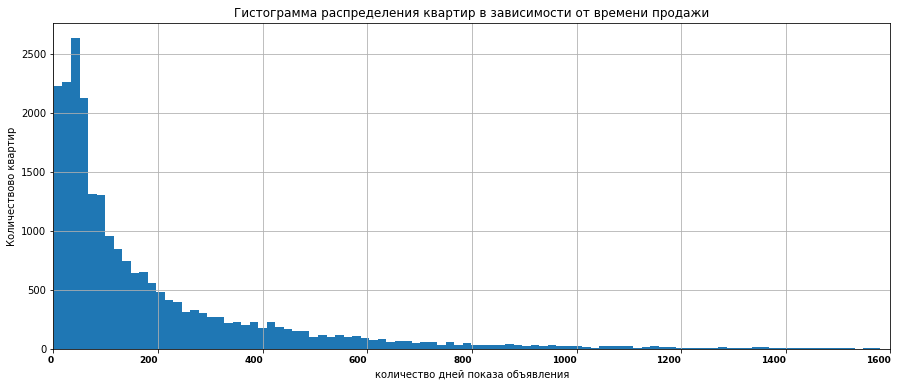

In [74]:
 #гистограмма дней показа объявления
data3['days_exposition'].hist(bins=100, figsize=(15, 6))
plt.xlabel('количество дней показа объявления')
plt.grid(True)
plt.ylabel('Количествово квартир')
plt.title('Гистограмма распределения квартир в зависимости от времени продажи')
plt.xticks(color='black', fontweight='bold', fontsize='9', horizontalalignment='right')
plt.xlim(0,1600)
plt.show()

### <a id='step_3'></a><h3>3 Добавляем необходимые параметры данных (столбцы)</h3>   

[К оглавлению](#step_0)

<a id='step_3.1'></a><h3>3.1 цена квадратного метра (в тыс. руб.)</h3>   

[К оглавлению](#step_0)


In [75]:
#цена квадратного метра (в тыс. руб.)
data3['price_per_square_meter'] = data3['last_price'] / data3['total_area'] / 1000


<a id='step_3.1.1'></a><h3>3.1.1 Влиание булевых столбцов ( 'is_apartment', 'studio', 'open_plan') на цену квадратного метра (в тыс. руб.)</h3>   

[К оглавлению](#step_0)


In [76]:
#цена квадратного метра (в тыс. руб.)
data['price_per_square_meter'] = data['last_price'] / data['total_area'] / 1000


In [77]:
median_price = data['price_per_square_meter'].median()
c = data[data['is_apartment']==True]
a = data[data['is_apartment']==False]
median_price_apartment = c['price_per_square_meter'].median()
median_price_non_apartment = a['price_per_square_meter'].median()
print('медианный прайс ', median_price, 'медианный прайс аппартаментов ', median_price_apartment, 
      'медианный прайс без аппартаментов ', median_price_non_apartment)
print('увеличение стоимости кв. метра аппартаментов ', round((median_price_apartment/median_price_non_apartment-1)*100, 2), '%')

медианный прайс  95.0 медианный прайс аппартаментов  113.86650329769734 медианный прайс без аппартаментов  93.33333333333333
увеличение стоимости кв. метра аппартаментов  22.0 %


In [78]:
median_price = data['price_per_square_meter'].median()
c_s = data[data['studio']==True]
a_s = data[data['studio']==False]
median_price_studio = c_s['price_per_square_meter'].median()
median_price_non_studio = a_s['price_per_square_meter'].median()
print('медианный прайс ', median_price, 'медианный прайс студий ', 
      median_price_studio, 'медианный прайс без студий ', median_price_non_studio)
print('увеличение стоимости кв. метра студий', round((median_price_studio/median_price_non_studio-1)*100, 2), '%')

медианный прайс  95.0 медианный прайс студий  105.55555555555556 медианный прайс без студий  94.91133082234776
увеличение стоимости кв. метра студий 11.21 %


In [79]:
median_price = data['price_per_square_meter'].median()
c_o = data[data['open_plan']==True]
a_o = data[data['open_plan']==False]
median_price_open_plan = c_o['price_per_square_meter'].median()
median_price_non_open_plan = a_o['price_per_square_meter'].median()
print('медианный прайс ', median_price, 'медианный прайс с открытой планировкой ', median_price_open_plan, 
      'медианный прайс без открытой планировки ', median_price_non_open_plan)
print('увеличение стоимости кв. метра открытой планировки', 
      round((median_price_open_plan/median_price_non_open_plan-1)*100, 2), '%')

медианный прайс  95.0 медианный прайс с открытой планировкой  102.22222222222221 медианный прайс без открытой планировки  95.0
увеличение стоимости кв. метра открытой планировки 7.6 %


#### Выводы:  
параметры аппатаменты, студия и свободная планировка удорожает стоимость квадратного метра недвижимость на 22, 11 и 8% соответственно. Это странный результат, но, скорее всего, это объясняется новизной этого формата и, соответственно, повышенной ценой.

<a id='step_3.2'></a><h3>3.2 день недели, месяц и год публикации объявления</h3>   

[К оглавлению](#step_0)

In [80]:
#день недели, месяц и год публикации объявления:
#день недели:
data3['weekday_index'] = data3['first_day_exposition'].dt.weekday#находим числовой индекс дня недели
def weekday_value(day):
    #Возвращает день недели по числовому значения дня, используя правила:
    #- 0 понедельник, 6 воскресенье
    if day == 0:
        return 'понедельник'
    elif day == 1:
        return 'вторник'
    elif day == 2:
        return 'среда'
    elif day == 3:
        return 'четверг'
    elif day == 4:
        return 'пятница'
    elif day == 5:
        return 'суббота'
    else:
        return 'воскресенье'
data3['weekday'] = data3['weekday_index'].apply(weekday_value)#переводим индекс в буквенный день недели


data3['month'] = data3['first_day_exposition'].dt.month#месяц


data3['year'] = data3['first_day_exposition'].dt.year#год


<a id='step_3.3'></a><h3>3.3 этаж квартиры; варианты — первый, последний, другой</h3>   

[К оглавлению](#step_0)

In [81]:
#этаж квартиры; варианты — первый, последний, другой
def make_floor_type(row):
    #Возвращает этаж квартиры: первый, последний, другой 
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data3['floor_type'] = data3.apply(make_floor_type, axis=1)
#data.head(10)

 <a id='step_3.4'></a><h3>3.4 переводим цену в миллионы</h3>   

[К оглавлению](#step_0)

In [82]:
#перводим цену в миллионы, необходимо для диаграммы
data3['last_price_mil'] = data3['last_price'] / 1000000

display(data3.head())

index  total_images  last_price  total_area first_day_exposition  rooms  \
0      0            20  13000000.0       108.0           2019-03-07      3   
1      1             7   3350000.0        40.4           2018-12-04      1   
2      2            10   5196000.0        56.0           2015-08-20      2   
3      3             0  64900000.0       159.0           2015-07-24      3   
4      5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  ...  dinning_area  \
0        2.700000          16.0         51.0      8  ...           0.0   
1        2.644159          11.0         18.6      1  ...           0.0   
2        2.794964           5.0         34.3      4  ...           0.0   
3        2.794964          14.0         45.0      9  ...           0.0   
4        2.632759          12.0         14.4      5  ...           0.0   

   last_day_exposition  days_exposition5  price_per_square_meter  \
0           2019-03-07              68.0              120.370370   
1           2019-02-23             161.0               82.920792   
2           2017-02-28            1363.0               92.785714   
3           2016-09-20            1390.0              408.176101   
4           2018-11-04             246.0               95.065789   

   weekday_index      weekday  month  year  floor_type  last_price_mil  
0              3      четверг      3  2019      другой          13.000  
1              1      вторник     12  2018      первый           3.350  
2              3      четверг      8  2015      другой           5.196  
3              4      пятница      7  2015      другой          64.900  
4              0  понедельник      9  2018      другой           2.890  

[5 rows x 33 columns]

 <a id='step_4'></a><h3>4 Исследовательский анализ данных</h3>   

[К оглавлению](#step_0)

<a id='step_4.1'></a><h3>4.1  План исследования, основные параметры объектов</h3>   

[К оглавлению](#step_0)



1) общая площадь;

2) жилая площадь;

3) площадь кухни;

4) цена объекта;

5) количество комнат;

6) высота потолков;

7) этаж квартиры;

8) тип этажа квартиры («первый», «последний», «другой»);

9) общее количество этажей в доме;

10) расстояние до центра города в метрах;

11) расстояние до ближайшего аэропорта;

12) расстояние до ближайшего парка;

13) день и месяц публикации объявления.


<a id='step_4.1.1'></a><h3>4.1.1  Изучим основные параметры. Построим гистограммы для каждого параметра</h3>   

[К оглавлению](#step_0)

 

Изучим основные параметры: общая площадь, жилая площадь, площадь кухни, цена, число комнат, высота потолков, этаж квартиры, этаж дома, расстояние до центра города, расстояние до аэропорта, расстояние до парка, день недели и месяц подачи объявления

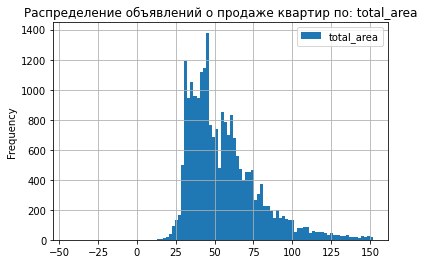

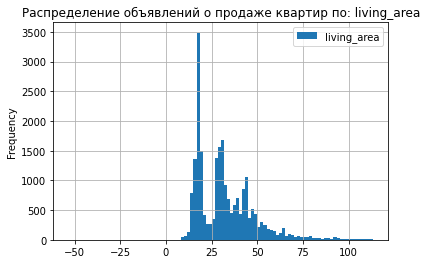

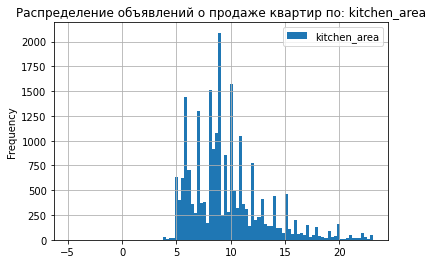

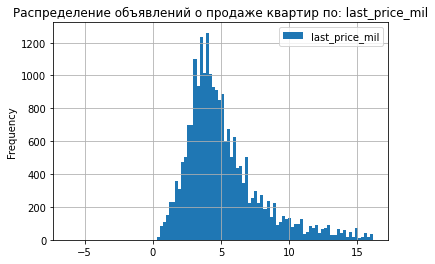

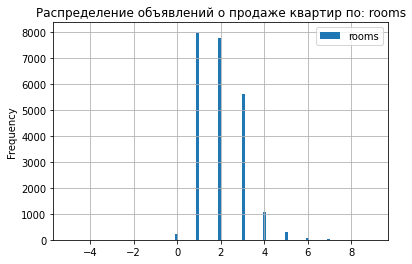

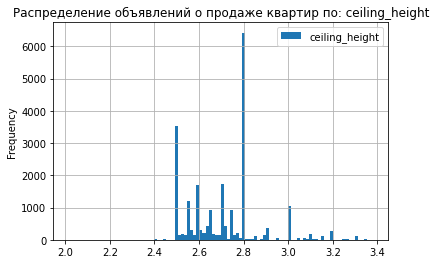

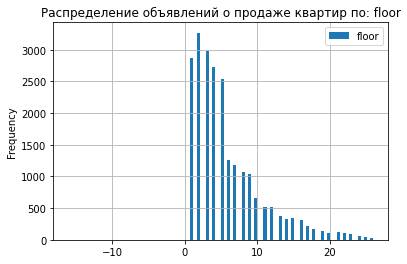

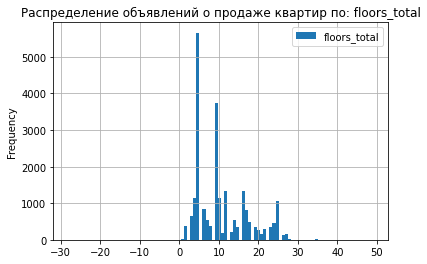

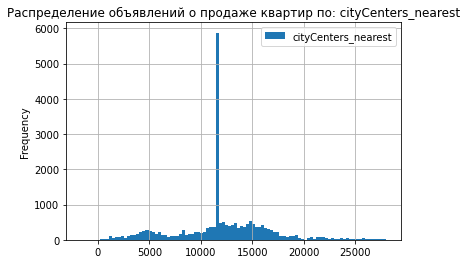

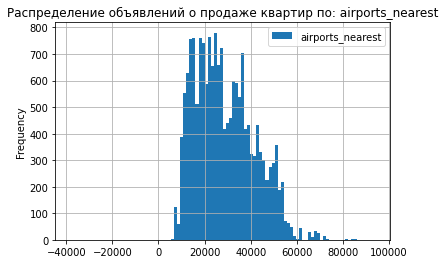

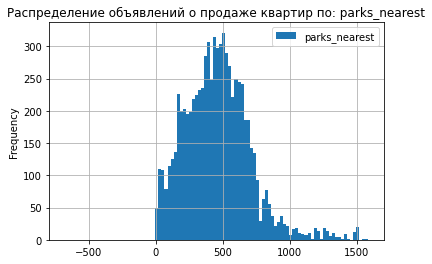

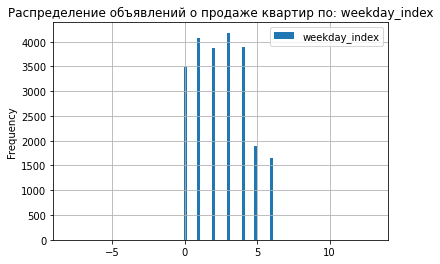

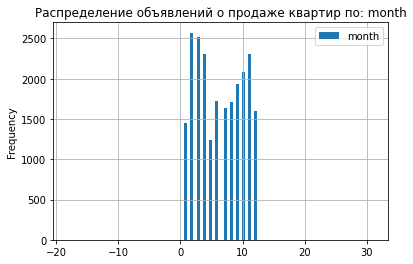

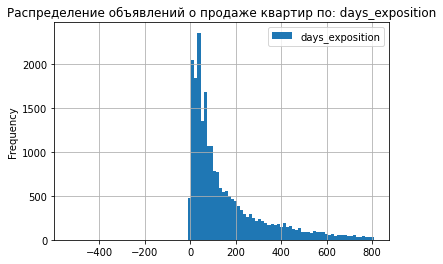

In [83]:
#построение диаграмм
study_list = ['total_area', 'living_area', 'kitchen_area','last_price_mil', 'rooms', \
              'ceiling_height', 'floor', 'floors_total', 'cityCenters_nearest', \
              'airports_nearest', 'parks_nearest', 'weekday_index', 'month', 'days_exposition']

for elem in study_list:
    Q1 = data3[elem].quantile(0.25)
    Q3 = data3[elem].quantile(0.75)
    IQR = Q3 - Q1
    (data3.plot(kind='hist', y = elem, title='Распределение объявлений о продаже квартир по: ' + elem, 
               grid=True, bins=100, range=(Q1-3*IQR,Q3+3*IQR)))
    plt.show()



 <a id='step_4.1.2'></a><h3>4.1.2 Изучим время продажи квартиры. Опишем гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа</h3>   

[К оглавлению](#step_0)

In [84]:
#Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
#Изучение времени продажи квартиры. Посчитаем среднее и медиану   
print('среднее время продажи квартиры: {} дней'.format(int(math.ceil(data3['days_exposition'].mean()))))
print('медианное время продажи квартиры: {} дней'.format(int(math.ceil(data3['days_exposition'].median()))))

#Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? 
print ('Быстрая продажа, дней: менее', int(data3['days_exposition'].quantile(0.25)))
print ('Обычное время продажи, дней:', int(data3['days_exposition'].quantile(0.5)))
print ('Долгая продажа, дней: более ', int(data3['days_exposition'].quantile(0.75)))

среднее время продажи квартиры: 185 дней
медианное время продажи квартиры: 94 дней
Быстрая продажа, дней: менее 44
Обычное время продажи, дней: 94
Долгая продажа, дней: более  235


In [85]:
data3.info()
data3['total_area'].min()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23056 entries, 0 to 23115
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   23056 non-null  int64         
 1   total_images            23056 non-null  int64         
 2   last_price              23056 non-null  float64       
 3   total_area              23056 non-null  float64       
 4   first_day_exposition    23056 non-null  datetime64[ns]
 5   rooms                   23056 non-null  int64         
 6   ceiling_height          23056 non-null  float64       
 7   floors_total            23053 non-null  float64       
 8   living_area             23056 non-null  float64       
 9   floor                   23056 non-null  int64         
 10  is_apartment            23056 non-null  bool          
 11  studio                  23056 non-null  bool          
 12  open_plan               23056 non-null  bool  

12.0

 <a id='step_4.1.3'></a><h3>4.1.3 Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили. Общий результат удаления</h3>   

[К оглавлению](#step_0)

In [86]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23056 entries, 0 to 23115
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   23056 non-null  int64         
 1   total_images            23056 non-null  int64         
 2   last_price              23056 non-null  float64       
 3   total_area              23056 non-null  float64       
 4   first_day_exposition    23056 non-null  datetime64[ns]
 5   rooms                   23056 non-null  int64         
 6   ceiling_height          23056 non-null  float64       
 7   floors_total            23053 non-null  float64       
 8   living_area             23056 non-null  float64       
 9   floor                   23056 non-null  int64         
 10  is_apartment            23056 non-null  bool          
 11  studio                  23056 non-null  bool          
 12  open_plan               23056 non-null  bool  

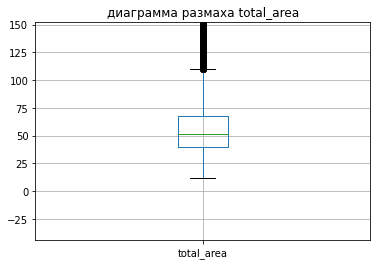

total_area = 0.25    40.0
0.50    51.2
0.75    68.0
Name: total_area, dtype: float64
Редкие и выбивающиеся значения для  total_area : меньше  -2.0  и больше  110.0


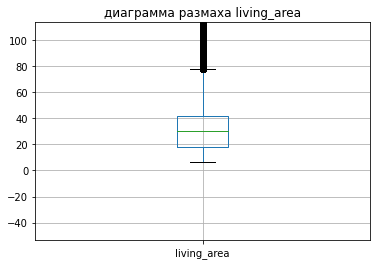

living_area = 0.25    18.2
0.50    30.0
0.75    42.0
Name: living_area, dtype: float64
Редкие и выбивающиеся значения для  living_area : меньше  -17.500000000000004  и больше  77.7


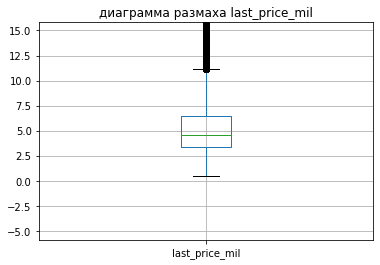

last_price_mil = 0.25    3.40
0.50    4.55
0.75    6.50
Name: last_price_mil, dtype: float64
Редкие и выбивающиеся значения для  last_price_mil : меньше  -1.2500000000000004  и больше  11.15


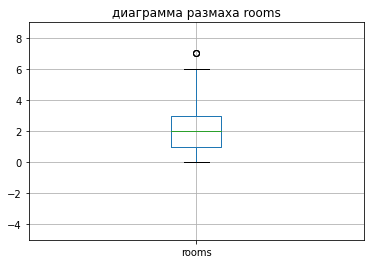

rooms = 0.25    1.0
0.50    2.0
0.75    3.0
Name: rooms, dtype: float64
Редкие и выбивающиеся значения для  rooms : меньше  -2.0  и больше  6.0


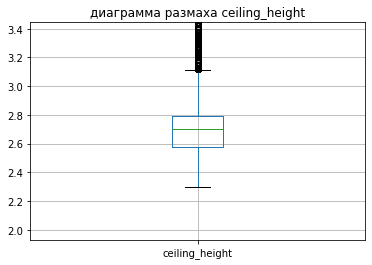

ceiling_height = 0.25    2.578571
0.50    2.700000
0.75    2.794964
Name: ceiling_height, dtype: float64
Редкие и выбивающиеся значения для  ceiling_height : меньше  2.2539830025846577  и больше  3.1195521385493787


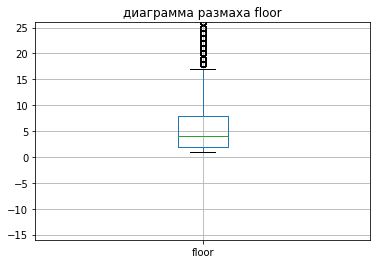

floor = 0.25    2.0
0.50    4.0
0.75    8.0
Name: floor, dtype: float64
Редкие и выбивающиеся значения для  floor : меньше  -7.0  и больше  17.0


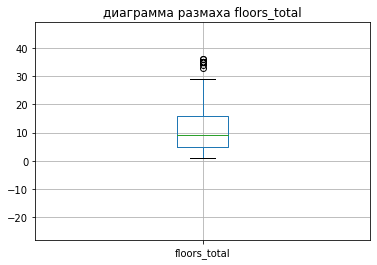

floors_total = 0.25     5.0
0.50     9.0
0.75    16.0
Name: floors_total, dtype: float64
Редкие и выбивающиеся значения для  floors_total : меньше  -11.5  и больше  32.5


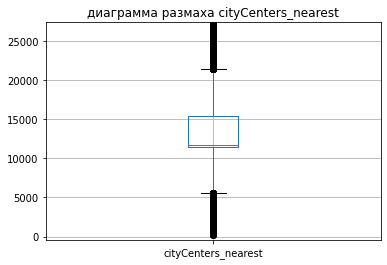

cityCenters_nearest = 0.25    11482.000000
0.50    11717.081234
0.75    15447.000000
Name: cityCenters_nearest, dtype: float64
Редкие и выбивающиеся значения для  cityCenters_nearest : меньше  5534.5  и больше  21394.5


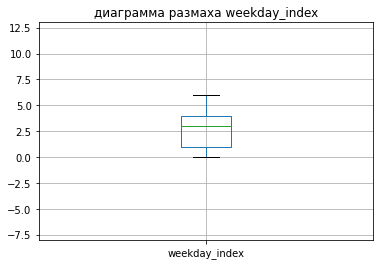

weekday_index = 0.25    1.0
0.50    3.0
0.75    4.0
Name: weekday_index, dtype: float64
Редкие и выбивающиеся значения для  weekday_index : меньше  -3.5  и больше  8.5


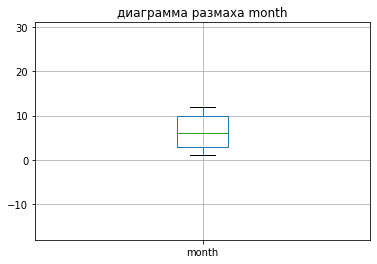

month = 0.25     3.0
0.50     6.0
0.75    10.0
Name: month, dtype: float64
Редкие и выбивающиеся значения для  month : меньше  -7.5  и больше  20.5


In [87]:
study_list2 = ['total_area', 'living_area', 'last_price_mil', 'rooms', \
              'ceiling_height', 'floor', 'floors_total', 'cityCenters_nearest', \
              'weekday_index', 'month'] 

for elem in study_list2:
    Q1 = data3[elem].quantile(0.25)
    Q3 = data3[elem].quantile(0.75)
    IQR = Q3 - Q1
    data3.boxplot(elem)#диаграмма размаха
    plt.ylim(Q1-3*IQR,Q3+3*IQR) #изменение масштаба по оси y
    plt.title('диаграмма размаха ' + elem )
    plt.show()
    print(elem, '=', data3[elem].quantile([.25, .5, .75]))#значение квартилей)
    if elem == 'ceiling_height':
        #по диаграмме верхнее значение потолка это 3,15 м, но на практике есть 4,5 метра
        data3 = data3[(data3[elem] >= (Q1-1.5*IQR)) & (data3[elem] <= 4.5)]
    if elem == 'living_area':
        #по диаграмме верхнее значение это 77 м, но на практике есть 100 метров, 6 метров - это ограничение по законодательству
        data3 = data3[(data3[elem] >= 6) & (data3[elem] <= 100)] 
    if elem == 'last_price_mil':
        #по диаграмме верхнее значение это 11,25 млн рублей, но на практике есть 18 млн рублей
        data3 = data3[(data3[elem] >= (Q1-1.5*IQR)) & (data3[elem] <= 18)]
    if elem == 'rooms':
        #по диаграмме верхнее значение это 7 комнат, но на практике есть 15 комнат
        data3 = data3[(data[elem] >= 0) & (data3[elem] <= 15)]
    if elem == 'floor':
        #по диаграмме верхнее значение это 17 этаж, но на практике есть 33 этаж
        data3 = data3[(data3[elem] >= 0) & (data3[elem] <= 33)]
    if elem == 'cityCenters_nearest':
        #по диаграмме верхнее значение это 25000м, но на практике есть 45000 метра
        data3 = data3[(data3[elem] >= 0) & (data3[elem] <= 45000)]        

    print('Редкие и выбивающиеся значения для ', elem,': меньше ', (Q1-1.5*IQR), ' и больше ', (Q3+1.5*IQR))

In [88]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22073 entries, 0 to 23115
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   22073 non-null  int64         
 1   total_images            22073 non-null  int64         
 2   last_price              22073 non-null  float64       
 3   total_area              22073 non-null  float64       
 4   first_day_exposition    22073 non-null  datetime64[ns]
 5   rooms                   22073 non-null  int64         
 6   ceiling_height          22073 non-null  float64       
 7   floors_total            22070 non-null  float64       
 8   living_area             22073 non-null  float64       
 9   floor                   22073 non-null  int64         
 10  is_apartment            22073 non-null  bool          
 11  studio                  22073 non-null  bool          
 12  open_plan               22073 non-null  bool  

 <a id='step_4.1.4'></a><h3>4.1.4 Выводы по полученным гистограммам и диаграммам размаха</h3>   

[К оглавлению](#step_0)



1) общая площадь

Распределение квартир по общей площади выглядит как распределение Гаусса. Максимальный пик на 45 метрах. От 30-ти до 45 метров максимальное количество квартир – судя по всему это одно- и двухкомнатные маломерные квартиры и студии. Второй выступ – это от 52-х до 65-ти метров – судя по всему это двушки, евро двушки.
Возможно всплески на гистограмме дают заполнение пропусков медианными значениями кухонь и жилой площади.
Чем больше площадь – тем глаже гистограмма.
Львиная доля квартир ложит в интервале от 27-ми до 100 кв метров

2) жилая площадь

Распределение без учета всплесков имеет нормальное распределение, с учетом всплесков больше похоже на распределение Гаусса. Есть явные всплески на 20, 28 и 45 квадратных метрах жилой площади – судя по всему это всплески массовой застройки многоэтажными  домами – всплески дают типовые одно- двух- и трехкомнатные квартиры. Максимальный всплеск 18 метрах скорее всего связан с заполнением медианного значения в однокомнатных квартирах.
Львиная доля жилой площади квартир расположена в диапазоне от 14 до 77 квадратных метров. Однако, чтобы не потерять много данных по элитной недвижимости Ленинградской области отсекать будем после 100 кв. метров.
Медиана 30 кв метров

3) площадь кухни

гистограмма кухонь во всем массиве данных: пик на 8,5 метров, разброс от 4-х до 26 кв метров
основная часть значений столбца 'kitchen_area' лежит в диапазоне от 4-х до 26 метров. Будем считать от 26-ти метров и выше выбросами и до 4-х метров тоже аномалиями. Пик значений приходится на примерно 8,5 квадратных метров
После замены пропусков на медианные значения и удаления аномальных значений в гистограмме появились выбросы однако пик, тип распределения(нормальное) и интервал основной доли значений остались прежними

4) цена объекта

Медиана 4,55 млн рублей, там же расположен пик гистограммы, аномальные значения от 1,25 до  18 млн рублей. Гистограмма имеет явно нормальное распределение. Пики можно объяснить стандартной ценой от застройщика в новостройках .

5) количество комнат

Одно, двух и трехкомнатные квартиры имеют 8000, 7800 и 5600 частоту в объявлениях. Медианное значение - 2 комнаты. Распределение Гаусса. Аномальные значения  – больше 6 комнат, но, так как 7 комнат и выше – это тенденция, то отсекать значения мы будем после 15 комнат.

6) высота потолков

Имеет нормальное распределение, выбросы 2,5 и 2,8 м связаны с типовой застройкой в советский и постсоветский периоды. Мединала на 2,7м. Львиная доля значений лежит в интервале - 2,5 - 3,2 метров. Однако, так как в СПб есть квартиры с высокими потолками – отсекаем на 4,5 метра.

7) этаж квартиры

Медиана лежит на 4-х этажах, пик расположен на 2 этаже. Львиная доля квартир лежит в диапазоне от 0 до 17 этажей, но отсекать будем после 27-го этажа чтобы не потерять данные элитной недвижимости. Максимальное количество квартир расположено с 1-го по 5 этаж – поблагодарим за это Никиту Сергеевича Хрущева и его массовую застройку пятиэтажками в советский период. Немного ниже уровень расположения квартир на 6-9 этажах – многоэтажки позднего советского периода (9-этажки). Более высокие этажи характерны современным застройкам крупных городов РФ в постсоветский период когда квартиры стали объектами собственности, взлетели в цене и этажность стала играть важную роль в слагаемых цены квартиры. Шутливое название таких домов - «человейники». При этом, чем выше дом, тем дешевле вклад фундамента, общедомовых и инженерных коммуникаций а также лифтов в общую стоимость квартиры. Кроме того увеличенное количество квартир на низких этажах связано с тем что они есть и в малоэтажном и в много этажной застройке.

8) тип этажа квартиры («первый», «последний», «другой»)

См выводы ниже

9) общее количество этажей в доме

На гистограмме общей этажности домов мы явно наблюдаем пики в районе 5, 9, 12, 17 и 25 этажной типовой застройки, причем львиная доля квартир продается в домах от 1-го до 27 этажей.

10) расстояние до центра города в метрах

Медиана примерно 11.7 км. Основной диапазон расположения максимального количества квартир от 5,5 км до 21,4 км. Однако для того чтобы не потерять большую долю недвижимости из пригородов СПб, ограничим сверху диапазон 45 км. Максимальный пик лежит на общей медиане столбца расстояние до центра города 11,7км, это свидетельствует о том, что многие пропуски именно в этом столбце при руппировке но населенному пункту давали значения NaN и мы вынуждены были заполнять их общим медианным значением.
мы видим 3 пика на гистограмме - это в районе 4000 м, от 11000  до 15000 м. на мой взгляд, ситуация объясняется так: Максимальный пик на 11000 - это среднее расстояние 

 <a id='step_4.1.5'></a><h3>4.1.5 Какие факторы больше всего влияют на стоимость квартиры? </h3>   

[К оглавлению](#step_0) 

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года

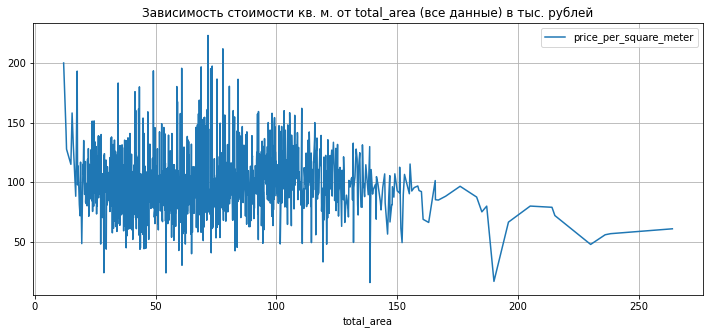

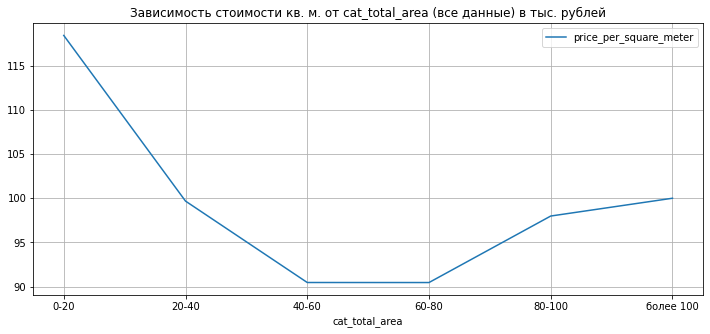

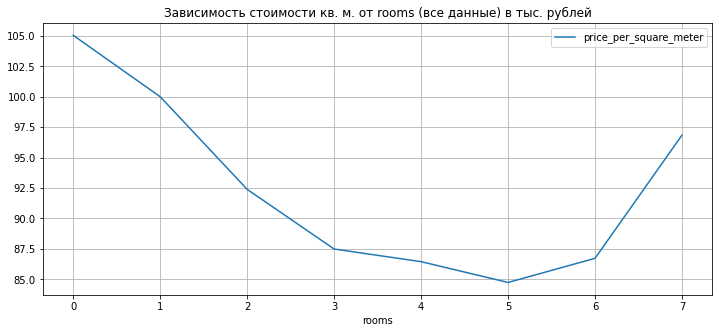

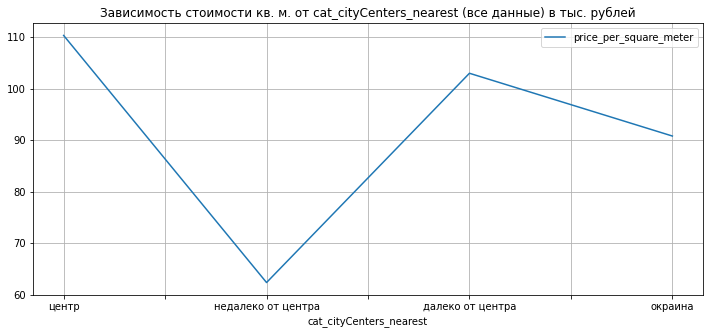

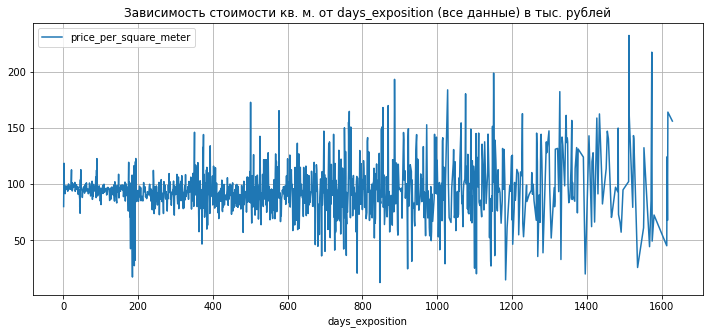

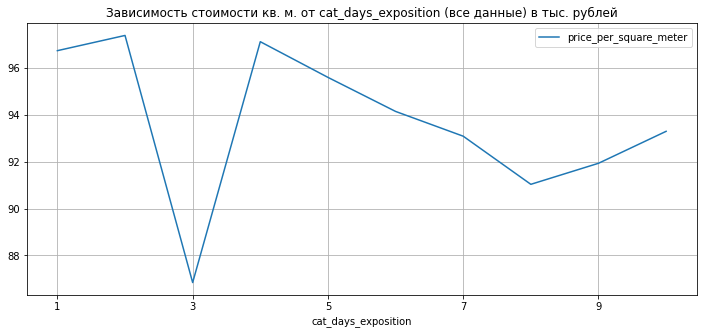

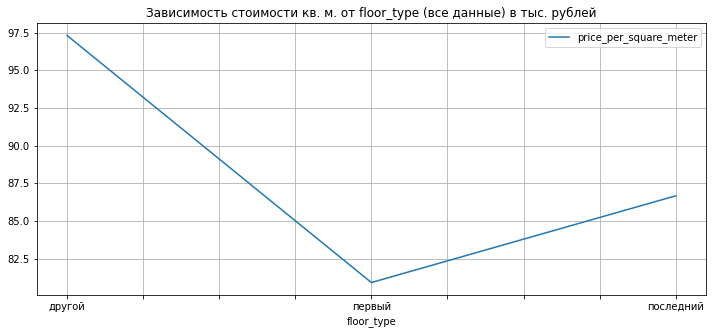

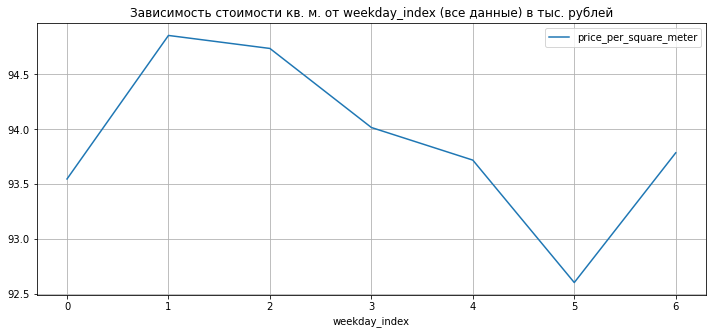

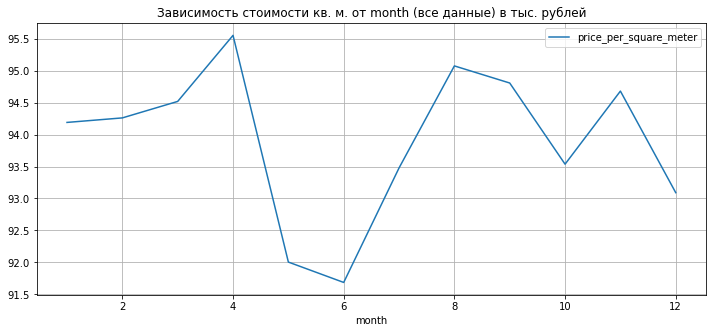

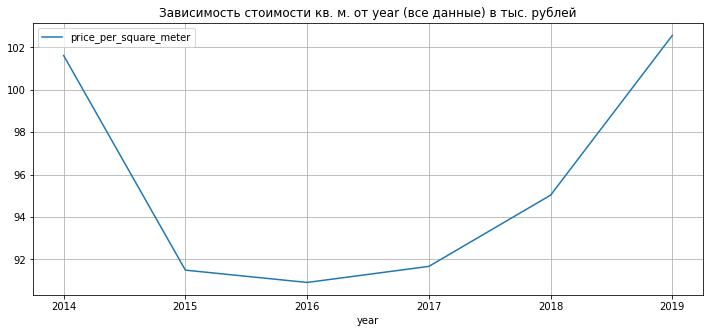

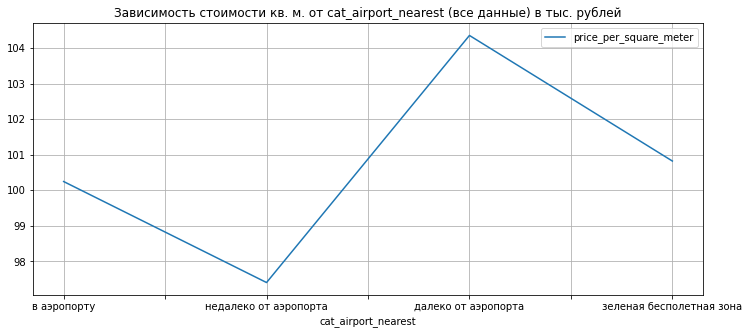

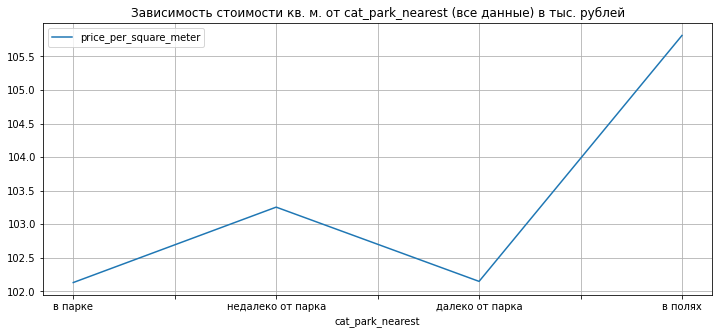

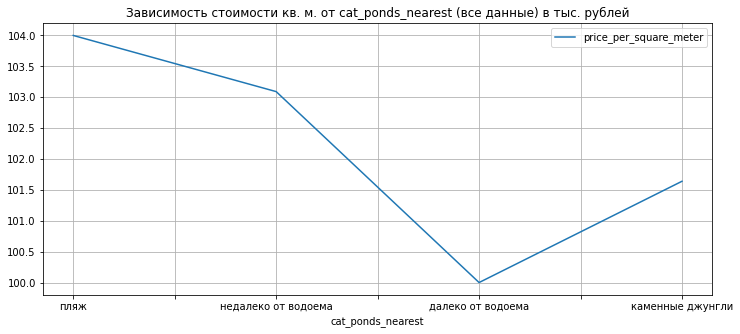

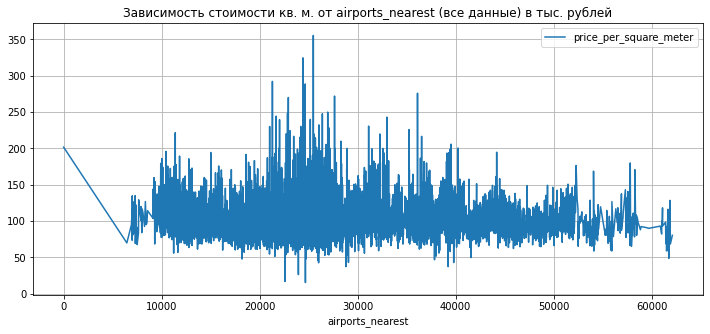

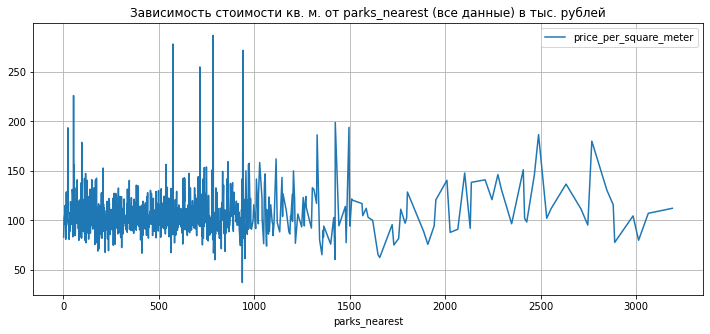

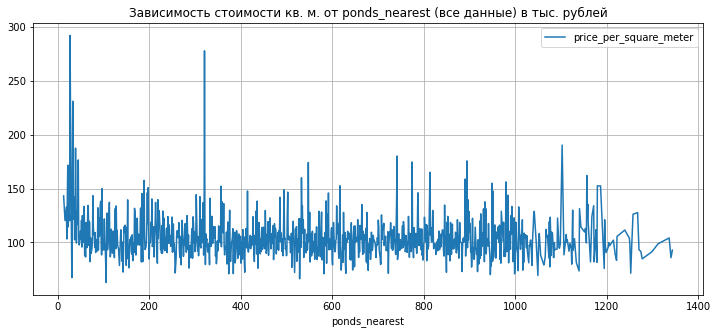

In [89]:
#категоризируем площадь квартиры
def make_cat_total_area(total_area):
    if 0 <= total_area < 20:
        return '0-20'
    elif 20 <= total_area < 40:
        return '20-40'
    elif 40 <= total_area < 60:
        return '40-60'
    elif 60 <= total_area < 80:
        return '60-80'
    elif 80 <= total_area < 100:
        return '80-100'
    else:
        return 'более 100'
data3['cat_total_area'] = data3['total_area'].apply(make_cat_total_area)

#категоризируем удаленность от центра
data3['cat_cityCenters_nearest'] = (pd.qcut(data3['cityCenters_nearest'], 4, 
                                           labels=['центр', 'недалеко от центра', 'далеко от центра', 'окраина']))

#категоризируем дни продажи по децилям
data3['cat_days_exposition'] = (pd.qcut(data3['days_exposition'], 10, 
                                           labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']))

#категоризируем удаленность от центра
data3['cat_airport_nearest'] = (pd.qcut(data3['airports_nearest'], 4, 
                                           labels=['в аэропорту', 'недалеко от аэропорта', 'далеко от аэропорта', 'зеленая бесполетная зона']))
#категоризируем удаленность от центра
data3['cat_park_nearest'] = (pd.qcut(data3['parks_nearest'], 4, 
                                           labels=['в парке', 'недалеко от парка', 'далеко от парка', 'в полях']))
#категоризируем удаленность от центра
data3['cat_ponds_nearest'] = (pd.qcut(data3['ponds_nearest'], 4, 
                                           labels=['пляж', 'недалеко от водоема', 'далеко от водоема', 'каменные джунгли']))
#в цикле  на основании сводной таблицы строим график зависимости цены кв. м от показателя (по списку)
study_list = ['total_area', 'cat_total_area', 'rooms', 'cat_cityCenters_nearest', 'days_exposition', 'cat_days_exposition',
              'floor_type',  'weekday_index', 'month', 'year', 'cat_airport_nearest', 'cat_park_nearest', \
              'cat_ponds_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest']
for elem in study_list:
    (data3
        .pivot_table(index=elem, values='price_per_square_meter', aggfunc='median')#делаем сводную таблицу
        .plot(grid=True, figsize=(12, 5), 
              title = 'Зависимость стоимости кв. м. от ' + elem + ' (все данные) в тыс. рублей')#строим график, задаем сетку и размер
    )

 <a id='step_4.2'></a><h3>4.2 Выводы о зависимости стоимости кв метра:</h3>   

[К оглавлению](#step_0) 

 <a id='step_4.2.1'></a><h3>4.2.1  От общей площади:</h3>   

[К оглавлению](#step_0) 



Стоимость кв метра зависит от общей площади - чем меньше квартира, тем выше среднее значение стоимости кв. метра. График дискретный колебания относительно средней линии затухают при увеличении общей площади жилья. Максимальные колебания стоимости кв. метра наблюдаются от 45-ти до 70-ти метров, это скорее всего связано с широким представлением таких квартир на рынке. Могу предположить что колебания цены могут быть связаны с сезонностью

 <a id='step_4.2.2'></a><h3>4.2.2 От общей площади квартиры</h3>   

[К оглавлению](#step_0)  



Стоимость кв метра маленьких квартир уменьшается с увеличением общей площади квартиры в квартирах до 40-60 метров. Снижение резче проявляется от 0 до 20-ти метровых квартир(Это связано с тем, что площадь санузла и коридоров стандартизована и является одиноковой даже для маленьких квартир, и скорее всего именно она вносит существенный вклад в стоимость малометражных квартир). В диапазоне от 40-60 до 60-80 стоимость кв метра стабильна. Стоимость квадратного метра больших квартир от 80 кв метров снова растет. Скорее всего это связано с тем, что категория таких квартир перестает быть массовой и становится элитной, там больше опций, и вследствие этого, больше и цена)

 <a id='step_4.2.3'></a><h3>4.2.3 От количества комнат</h3>   

[К оглавлению](#step_0)  



Квартиры до 5 комнат имеют стоимость кв метра обратно пропорциональна количеству комнат, зависимость практически линейная. Далее стоимость квартир растет - опять же скорее всего потому что в массовом сегменте таких больших квартир нет и они принадлежал классу премиум

 <a id='step_4.2.4'></a><h3>4.2.4  От категории удаленности от центра города</h3>   

[К оглавлению](#step_0) 



Стоимость квадратного метра в категории в центре(радиус 16,5 км) максимальная, несмотря на то, что мы заменили в малых городах пропуски на 3 км и это дало снижение стоимости квадратного метра в СПб. Второй по стоимости идет далеко от центра мы разбили на 4 категории, значит это от 33-х до 49 км от центра СПб - это, по всей видимости, ближайшие пригороды Санкт-Петербурга и районы коттеджных поселков. Самая низкая стоимость квадратного метра от 17 до 33  км от центра Спб - это новые районы Санкт-Петербурга, которые массово застраиваются панельными многоэтажками, цена за квадратный метр в которых низкая.

 <a id='step_4.2.5'></a><h3>4.2.5 от даты размещения объявления</h3>   

[К оглавлению](#step_0)       


Зависимость стоимости квадратного метра от даты размещения объявления дискретна и имеет неявновыраженную среднюю линию чуть ниже 100 тыс за квадратный метр. Амплитуда колебаний цены после 350 дней (скорее всего через год) становится явно больше, колебания есть как вверх, так и вниз. Скорее всего это связано с психологической отметкой срока в 1 год, и решением поднять цену если цены  выросли или снизить цену, если нашелся покупатель.Зависимость стоимости квадратного метра от даты размещения объявления дискретна и имеет неявновыраженную среднюю линию чуть ниже 100 тыс за квадратный метр. Амплитуда колебаний цены после 350 дней (скорее всего через год) становится явно больше, колебания есть как вверх, так и вниз. Скорее всего это связано с психологической отметкой срока в 1 год, и решением поднять цену если цены  выросли или снизить цену, если нашелся покупатель.

Если же посмотреть нормализованный, очищенный от шумов график (мы разбили на 10 категорий сроки размещения, значит шаг категории у нас 158 дней - примерно 5 месяцев) первые 10 месяцев цена практически неизменна, до 15 месяцев идет 10% падение цены - видимо это связано с твердым решением продать найденному покупателю квартиру (вполне вероятно что это связано с тактикой риэлтерских агентств). К 20-му месяцу цена возвращается на прежний уровень. После 20-го месяца идет снижение стоимости квадратного метра - думаю что тут вносят коррективы общая ситуация на рынки недвижимости и доступностью финансирования после 2014 года.

 <a id='step_4.2.6'></a><h3>4.2.6 От категории "первый, верхний и другой"</h3>   

[К оглавлению](#step_0)  


Зависимость цены от категории "первый, верхний и другой" - самая большая цена квадратного метра у средних этажей - категория "другой", самая дешевая цена - у первых этажей, следом идут верхние.

 <a id='step_4.2.7'></a><h3>4.2.7 От дня недели</h3>   

[К оглавлению](#step_0)  


Стоимость квадратного метра в зависимости от дня недели - от субботы до вторника - цена растет, от вторника к субботе - падает. Скорее всего это связано с рабочей неделей и возможностью закрыть сделку до конца недели. Суббота - день после "пьяной" пятницы - возможно этим можно объяснить снижение цены.

 <a id='step_4.2.8'></a><h3>4.2.8 От месяца</h3>   

[К оглавлению](#step_0)  


Стоимость квадратного метра в зависимости от месяца имеет ярко выраженную тенденцию. В Апреле и августе цены растут (около 4%) - это связано с тем, что люди стремятся купить жилье накануне майских праздников - чтобы было максимум дней на ремонт или переезд, или покупают недвижимость к началу нового учебного года. Цена снижается в июню - сезон летних отпусков и к декабрю - сезон подготовки к празднованию Нового года. Однако, некоторые (во всяком слечае раньше так было) приурочивали покупку квартиру к новому году (тоже длинные выходные) как подарку небольшой всплеск цены в ноябре  и та же цена в марте (+3%). Но, видимо цена квартир настолько высока, что все меньше людей могут позволить себе такой "подарок"

 <a id='step_4.2.9'></a><h3>4.2.9  От года</h3>   

[К оглавлению](#step_0) 


Стоимость квадратного метра 2014-2015гг получила резкое падение 10% - думаю что это связано с санкциями, которые были введены в 2014 году за "КрымНаш". 2015-2017 года отмечены отсутствием роста стоимости квадратного метра жилья. Основной источник покупки жилья это кредитные средства, российские банки престали щедро кредитовать как покупателей жилья, так и затройщиков. Цены вынужденно пошли вниз и остановились на уровне около 90 тыс. рублей за квадратный метр. За 3 года кризис был преодолен и цены снова стали расти.

 <a id='step_4.3'></a><h3>4.3 ТОП 10 населённых пунктов.</h3>   

[К оглавлению](#step_0)  

Выделим ТОП 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [90]:
#создаем таблицу с топ-10 числом объявлений
data_top10 = data3['locality_name'].value_counts() #series
df_data_top10 = pd.DataFrame(data_top10)#переводим из series в DF
df_data_top10 = df_data_top10.head(10)#сохраняем только топ-10 населенных пуктов

#создаем таблицу с медианой стоимост за кв. м. 
data_price_area = data3.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='median')
df_data_top10 = df_data_top10.join(data_price_area)#объединяем две таблицы, по левой таблице, все остальное отбрасываем
df_data_top10.columns = ['count','price_per_square_meter']
display(df_data_top10.sort_values(by='price_per_square_meter', ascending=False))
#населенный пункт это индексный столбец в таблице, через idxmax и idxmin найдем индексы макс и мин значения цены кв. м
print('Самая высокая стоимость жилья:', df_data_top10['price_per_square_meter'].idxmax())
print('Самая низкая стоимость жилья:', df_data_top10['price_per_square_meter'].idxmin())

count  price_per_square_meter
санкт-петербург    14524              103.145438
пушкин               349               99.257862
деревня кудрово      297               92.000000
поселок парголово    326               91.780224
поселок мурино       583               86.111111
поселок шушары       437               76.923077
колпино              337               74.722222
гатчина              303               67.796610
всеволожск           392               65.737874
выборг               232               58.133214

Самая высокая стоимость жилья: санкт-петербург
Самая низкая стоимость жилья: выборг


<a id='step_4.4'></a><h3>4.4 Зависимость цены от удаленности от центра в Санкт-Петербурге. Зона центра.</h3>   

[К оглавлению](#step_0)   

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге ('locality_name'). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14524 entries, 0 to 23114
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    14524 non-null  int64         
 1   total_images             14524 non-null  int64         
 2   last_price               14524 non-null  float64       
 3   total_area               14524 non-null  float64       
 4   first_day_exposition     14524 non-null  datetime64[ns]
 5   rooms                    14524 non-null  int64         
 6   ceiling_height           14524 non-null  float64       
 7   floors_total             14523 non-null  float64       
 8   living_area              14524 non-null  float64       
 9   floor                    14524 non-null  int64         
 10  is_apartment             14524 non-null  bool          
 11  studio                   14524 non-null  bool          
 12  open_plan                14524 n

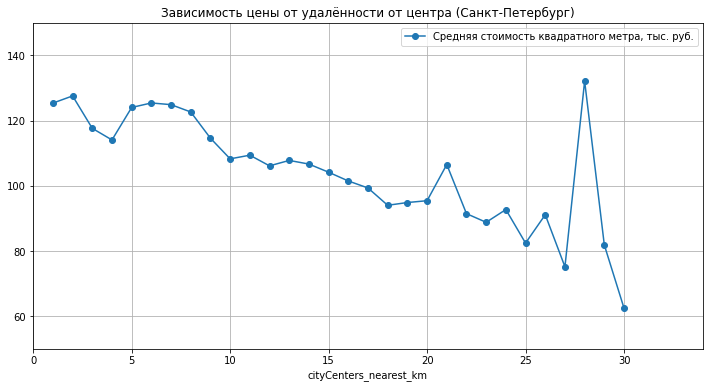

In [91]:
data_spb = data3[data3['locality_name'] == 'санкт-петербург'].copy()
data_spb.info()

data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest'].apply(lambda x: int(math.ceil(x /1000)))

data_spb_groupkm = data_spb.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter')
data_spb_groupkm
(data_spb_groupkm.plot(y='price_per_square_meter', label='Средняя стоимость квадратного метра, тыс. руб.', 
                     title='Зависимость цены от удалённости от центра (Санкт-Петербург)', style='o-', xlim=(0, 34), 
                     ylim=(50, 150), grid=True, figsize = (12, 6)))
plt.show()

Стоимость квадратного метра жилья начинает резко меняться после 8 км от центра города - это и есть центральная зона. Зависимость напоминает линейную, падение от 130 тыс руб до 70 тыс руб за расстояние 30 км. То есть при удалениее от центра города стоимость квадратного метра жилья падает на 2000 рублей за километр

 <a id='step_4.5'></a><h3>4.5 Санкт-Петербург центр и окраина в чем разница по основным параметрам</h3>   

[К оглавлению](#step_0) 

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

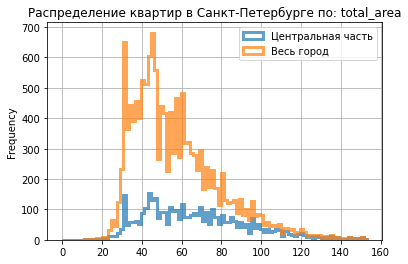

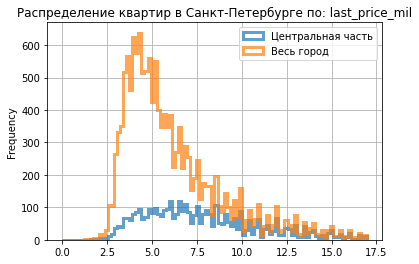

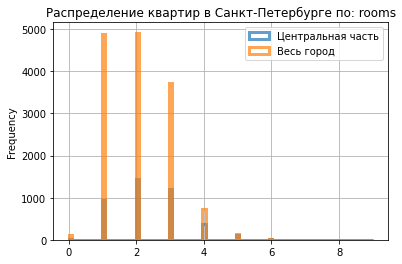

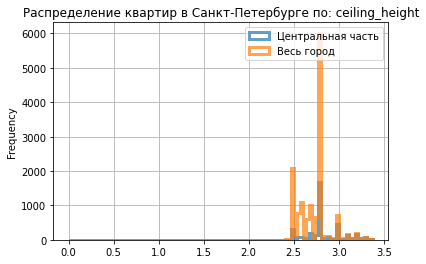

In [92]:
#отбираем квартиры в центре СПб
data_spb_10km = data_spb[data_spb['cityCenters_nearest_km'] <= 10]

#изучаем: площадь, цену, число комнат, высоту потолков
#строим график, отображаем центр и весь город на одном графике
study_list = ['total_area', 'last_price_mil', 'rooms', 'ceiling_height']
for elem in study_list:
    Q1 = data_spb[elem].quantile(0.25)
    Q3 = data_spb[elem].quantile(0.75)
    IQR = Q3 - Q1
    ax = (data_spb_10km.plot(kind='hist', y=elem, histtype='step', label='Центральная часть', 
                    linewidth=3, alpha=0.7, grid=True, bins=100, range=(0,Q3+3*IQR)))#центр
    (data_spb.plot(kind='hist', y= elem, histtype='step', label='Весь город',
                   linewidth=3, alpha=0.7,ax=ax, grid=True, bins=100, range=(0,Q3+3*IQR),
                    title= 'Распределение квартир в Санкт-Петербурге по: ' + elem))#весь город
    plt.show()

 #### Выводы

Распределение квартир в центральной части и весь город отличаются:

по общей площади и по цене - распределения похожие, только квартир в центральной части значительно меньше. Цены, как ни странно, похожи. Маломерных и "дешевых" квартир во всем городе намного больше чем в центре - вывод - такое жилье строится вне пределов центра северной столицы - на окраине. В центре преобладают "двушки" и "трешки", однокомнатных чуть меньше. Весь город - больше всего однушек и двушек, на втором месте - трешки и на третьем 4-хкомнатные. Видимо самый недорогой сегмент одно- и двух-х и трехкомнатных квартир на периферии СПб имеет максимальный спрос.

Высота потолков имеет пики на уровне 2,75-2,8 - это скорее всего новостройки, причем этот пик наблюдается и на периферии и в центре. Второй пик в районе 2,5 метров - это наше советское наследие в виде хрущевкок и, вполне вероятно, дешевые новостройки. Третий пик находится в районе 3 метровых потолков (и выше), причем в центре их относительно много - это скорее всего элитные новостройки в центре и на окраине.

<a id='step_4.6'></a><h3>4.6  Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Матрица корреляций</h3>   

[К оглавлению](#step_0) 

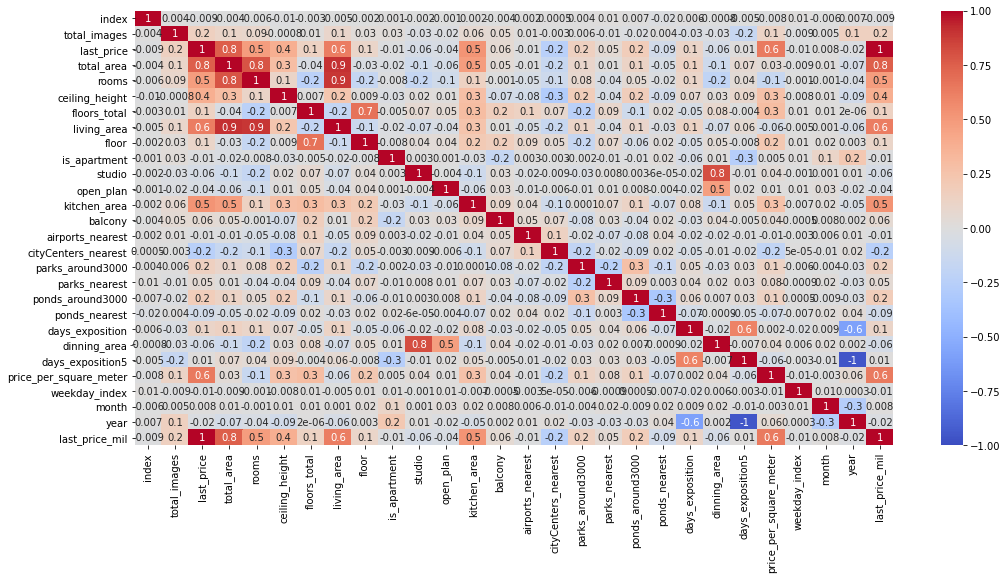

In [93]:
plt.figure(figsize=(17, 8))
sns.heatmap(data3.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

#### Выводы:   
Согласно матрице корреляций:  
0.8 - максимальный вклад в стоимость квадратного метра вносит общая площадь квартиры 'total_area';  
0.6 - Далее идет - жилая площадь 'living_area';  
0.5 - Количество комнат 'rooms' и площадь кухни 'kitchen_area';  
0.4 - Высота полтолков 'ceiling_height'  
0.2 - наличие парка и водоема в радиусе 3000м  
0.1 - этаж дома, этаж квартиры и время экспозиции объявления    
-0.2 - обратная корреляция с расстоянием до центра  

<a id='step_4.7'></a><h3>4.7  Графики зависимости цены кв. м от основных показателей</h3>   

[К оглавлению](#step_0) 

В цикле  на основании сводной таблицы строим график зависимости цены кв. м от показателя (по списку):  
'total_area',   
'cat_total_area',   
'rooms',   
'days_exposition',   
'cat_days_exposition',   
'floor_type',   
'weekday_index',   
'month',   
'year'  

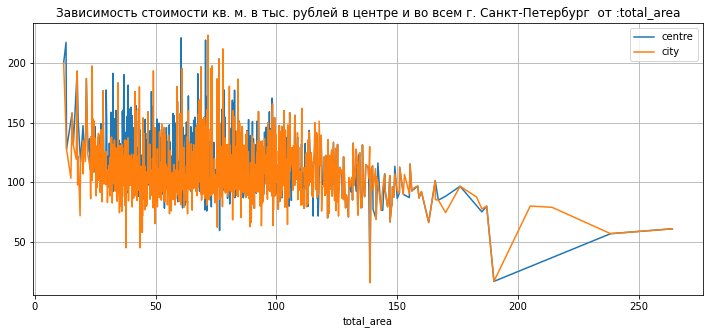

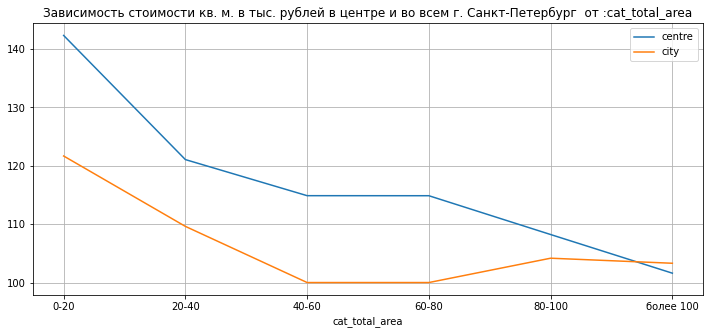

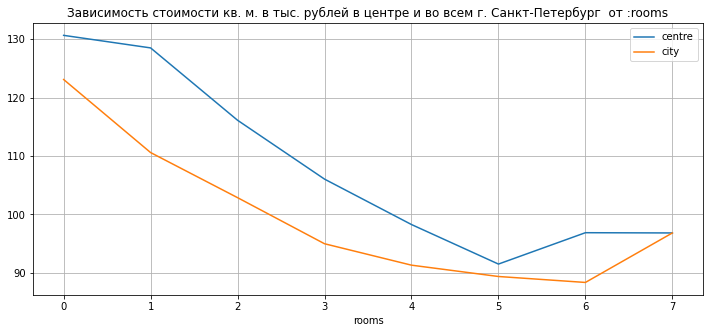

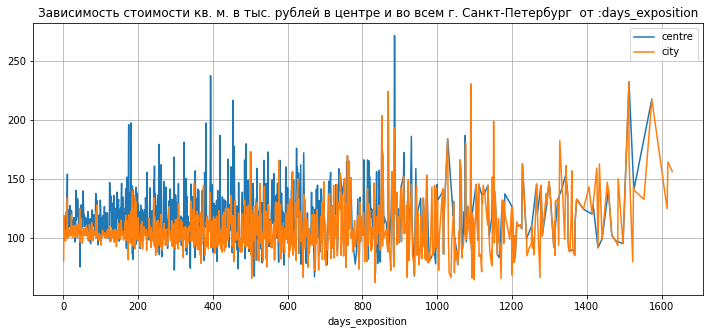

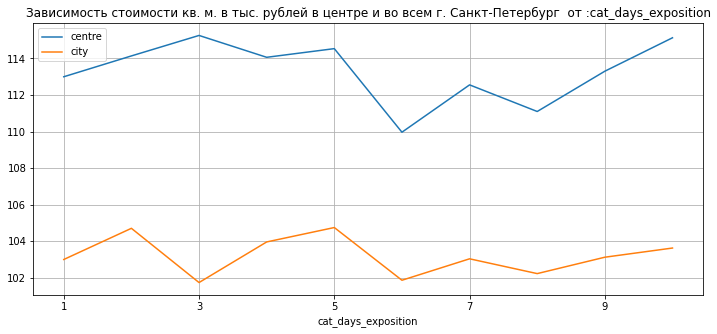

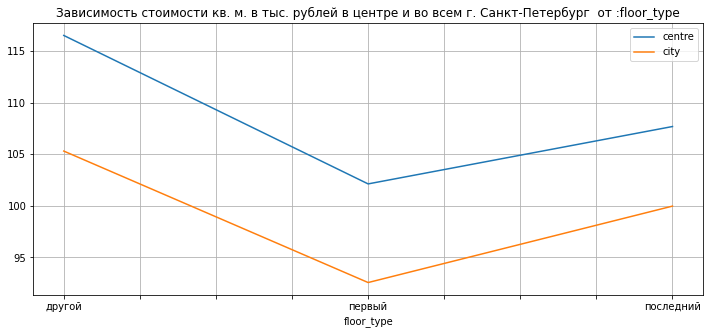

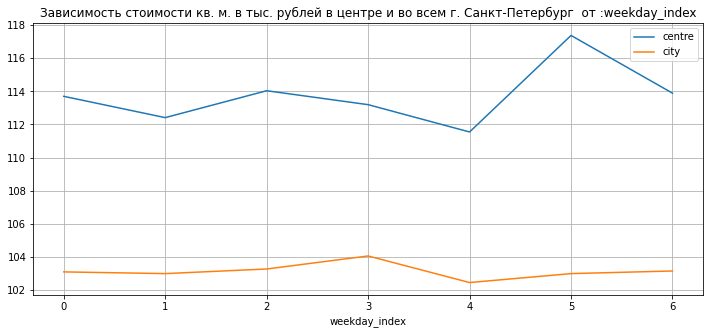

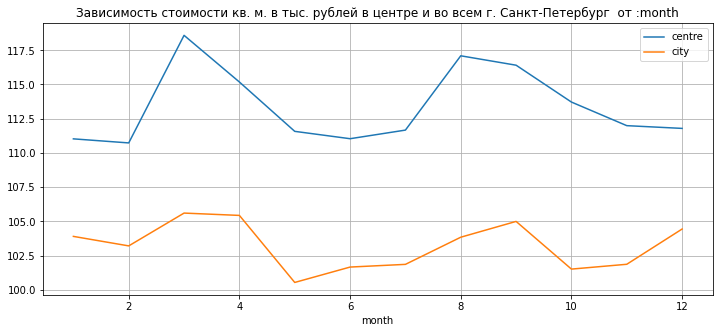

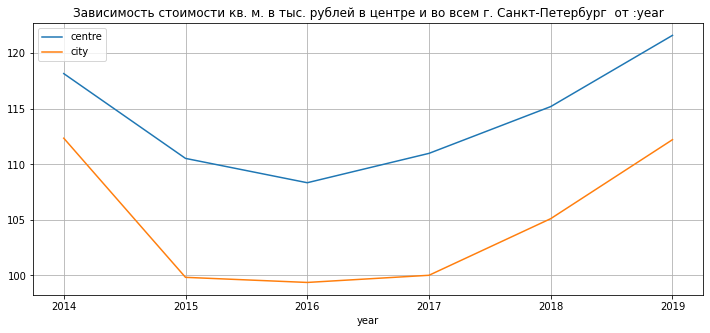

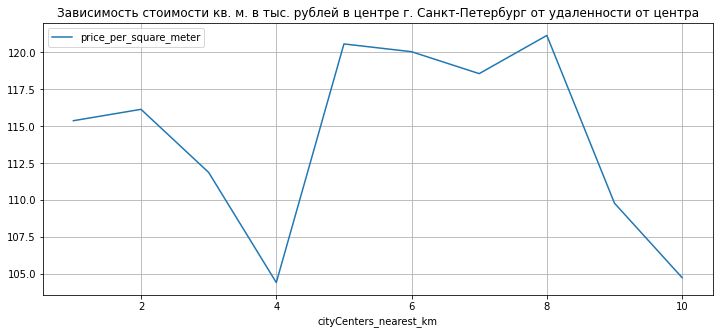

In [94]:
study_list = ['total_area', 'cat_total_area', 'rooms', 'days_exposition', 'cat_days_exposition', 
              'floor_type', 'weekday_index', 'month', 'year']
for elem in study_list:
    #график для центра
    data3 = data_spb_10km.pivot_table(index=elem, values='price_per_square_meter', aggfunc='median')
    data3.columns = ['centre']
    ax = data3.plot(grid=True, label='Центральная часть')#строим график
    #график для всего города
    data_pivot = data_spb.pivot_table(index=elem, values='price_per_square_meter', aggfunc='median')#делаем сводную таблицу
    data_pivot.columns = ['city']
    (data_pivot.plot(grid=True, figsize=(12, 5), ax=ax, 
               title = 'Зависимость стоимости кв. м. в тыс. рублей в центре и во всем г. Санкт-Петербург  от :'+ elem)
    )
    plt.show()
    
#удаленность от центра строим один график (разные расстояния)
(data_spb_10km
    .pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter', aggfunc='median')#делаем сводную таблицу
    .plot(grid=True, figsize=(12, 5), 
          title = 'Зависимость стоимости кв. м. в тыс. рублей в центре г. Санкт-Петербург от удаленности от центра')#строим график
)
plt.show()

<a id='step_4.7.1'></a><h3>4.7.1    Выводы</h3>   

[К оглавлению](#step_0)

Стоимость квадратного метра жилья в зависимости от общей площади квартиры имеет дискретный характер, однако в отличии от общего датасета тенденция к понижению стоимости с увеличением стоимости жилья тут выражена больше. График стоимости квадратного метра в центре лежит выше чем такой же график всего Санкт-Петрбурга. На графике всего города при площади около 40 кв метров есть резкие аномалии вниз(снижение цены), в от 50-ти до 75-ти выбросы вверх (увеличение цены), начиная с 80 кв метров колебания цены затухают. На графике относящемуся к центру города превалируют выбросы вверх до 80 кв метров. Предложения от 100 кв метров намного реже.  
На графике зависимости цены за квадратный метр без шумов(категориальный) - от 20-ти до 40-60 и 60-80 цена падает. На участке от 40-60 до 60-80, цена за квадратный метр практически константа(самый продаваемы и массовый сегмент). В категории от 100 кв метров цена за квадратный метр во всем городе и в центре сравниваются и даже в сегменте более 100 кв метров цена во всем городе выше чем в центре. Вероятно это можно объяснить коттеджным строительством в ближайших пригородах Санкт-Петербурга.
Стоимость квадратного метра в центре и во всем городе отностиельно количества комнат имеет постоянную дельту, в центре ценник выше - это логично. В районе 7 комнат цена за квадратный метр сравниваются. Это скорее всего связано с элитным жильем. Кто-то покупает такое жилье и ходит пешком на работу, а кто-то следит за здоровьем и предпочитает свежий воздух вне центра города.
Стоимость квадратного метра жилья в зависимости от срока размещения в центре СПб и во всем городе имеет дискретный характер со слабой тенденцией к понижению. График всего города имеет меньшую амплитуту колебаний чем он же для центра. Колебания цены за квадратный метр жилья в зависимости от времени размещения объявления в центре имеют всплески вверх (повышение цены). Амплитуда увеличивается от 170 дней (примерно пол года). То же самое наблюдается для всего города начиная с 300 дней- 10-ти месяцев. Возможно это связано с разнонаправленностью движения цены в центре и на периферии - что в случае с графиком всего города нивелирует друг друга (Летом растет стоимость коттеджного жилья, и падает в центре и наоборот зимой).
На таком же графике, очищенном от шумов есть колебания в пределах 3% погрешности на обоих графиках, но стоимость квадратного метра в центре всегда на дельту больше.  
Зависимость стоимости квадратного метра в СПБ в центре и в городе в целом от категории этажа - абсолютно аналогична такому же графику относящемуся ко всему датасету. Минимальную стоимость имеют первые этажи, максимальную - средние (другой), верхние этажи (последний) лежат между ними. Как и на других графиках - цена в центре с всем городе отлтчается на дельту.


В отличии от всего датасета зависимость стоимости квадратного метра к дню недели в центре Санкт_Петребурга отличается - максимумы это суббота, минимумы пятница. Повышение стоимости к выходным можно объяснить загруженностью жителей северной столицы в будние дни, скорее всего они могут себе позволить любые операции с недвижимостью лишь в выходные дни. Естественно, график для центральной части города имеет люфт вверх (цена выше) и амплитуда колебания цены в графике для всего города гораздо ниже, можно сказать что он практически их не имеет.  
Зависимость стоимости квадратного метра от месяца в году в Санкт-Петербурге отличается от аналогияного графика для всего датасета. На нем (как с  в случае с центром города, так и для всего города есть падение в мае и рост в августе-сентябре), но, так же там присутствуют пики в марте и сентябре. Длинных праздников или каких-либо других событий я там не вижу, но есть версия что именно в эти месяцы обострения психических заболеваний люди продают свою недвижимсость в центре СПб или вообще в городе. Возможно, в силу более состоятельного населения, можно объяснить всплески в марте - подарками к женскому празднику - но это не точно. Само собой, график для центра города лежит выше графика всего города на дельту, то есть в центре цены всегда выше, но движутся они однонаправленно.  
Стоимость квадратного метра в зависимости от года начиная с 2016 года имеет рост для центра города, до 2016 - падение из-за санкций. Для всего Санкт-Петербурга график повторяет график всего датасета, следовательно именно окраины Санкт-Петербурга вносили самый большой вклад в стоимость квадратного метра жилья в зависимости от года.График для центра города ледит выше, а, значит, цены в центре выше.   
Последний график зависимости стоимости квадратного метра от удаленности от центра: он имеет ярко выраженный минимум в районе 4 км от центра города - возможно, что это связано с продажей в этом радиусе от центра многокомнатных квартир в старинных доходных домах царской постройки - жилье ветхое и многокомнатное (чем больше комнат, тем ниже цена за кв метр) или, возможно, там продаются комнаты в коммуналках - эти 2 фактора и могли дать минимум именно в этой части города(район набережных). Расстояние меньше 4 км - это историческая часть города - скорее всего там баснословные цены, районы далее 4 км - это места точечной застройки центра города. Районы города, приближающиеся к 10 км от центра - падают в цене из-за массовой застройки с меньшими ценами.  

<a id='step_5'></a><h3>5 Общий вывод</h3>   

[К оглавлению](#step_0)  

- Больше всего квартир с площадью около 45 кв.м. стоимостью примерно 3,5 млн - цена большинства квартир. 
- Практически одинаковое количество однушек и двушек (судя по объявлениям)
- Высота потолков 2,5 - 3 м в подавляющем числе квартир. Максимум квартир с потолком 2,8 м. 
- время продажи квартиры: Среднее - 181 дней. Медианное в- 95 дней. Быстрая продажа - менее 45 дней, долгая продажа - более 231 дня, обычное время продажи - 95 дней.    
Редкие и выбивающиеся значения для: 
- общей площади: более 114.25 кв.м.; 
- стоимости : более 10.725 млн.; 
- кол-ва комнат: более 6; 
- высоты потолков: по диаграмме размаха менее 2,2 м и более от 3,15, реально в Санкт-Петербурге можно встретить потолок до 5 м; 
- дней продажи: более 473 дней; 
- стоимости квадратного метра: менее 26 тыс./кв. м и больее 156 тыс./кв. м. 

- Существует прямая линейная взаимосвязь между общей площадью и ценой за квартиру (больше площадь больше стоимость).

Анализ зависимости стоимости кв. м. от: 
- общей площади: с увеличением общей площади стоимость кв. м. падает(обратная зависимость); 
- количества: с увеличением кол-ва комнат стоимость кв. м. падает(обратная зависимость); 
- удаленность от центра: чем дальше, тем дешевле(обратная зависимость); 
- дней продажи: в начале медианная стоимость примерно на одном уровне, а после 180 начинаетcя ее падение 
- этажа: самые дешевые квартиры на первом этаже, квартиры на последнем этаже на 10% дороже, а квартиры на "другом" этаже дороже почти на 20% 
- дня размещения: объявления о продаже квартир поданные в выходные почти на 2% дешевле самого "дорого" дня – среды 
- месяца размещения: май, июнь, декабрь – месяцы с наименьшей стоимость жилья, апрель, август, октябрь – пик стоимости 
- год размещения: после 2017 стоимость возросла на 25%   
10 населённых пунктов с наибольшим числом объявлений:   
- санкт-петербург, поселок мурино, поселок шушары, всеволожск, поселок парголово, колпино, деревня кудрово, пушкин, гатчина, выборг   
- Самая высокая стоимость жилья в санкт-петербурге (101,2 тыс./ кв. м.), а самая низкая стоимостью жилья в выборге (58,1 тыс./кв.м.).   

10 км - центральная зона в г. Санкт-Петербург. Квартиры в центре самые дорогие, разница с окраиной около 50%. Сравнение центра и всего г. Санкт-Петербург:  

- Квартиры в центре с площадь примерно до 60 кв. м. составляют примерно 1/5 от общего числа квартир, после постепенно снижается, квартиры с площадью 100+ практически все расположены в центре. Абсолютное большинство квартир в обеих категориях площадью 40-50 кв.м.  
- В центре больше всего квартир со стоимостью 5-7 млн, во всем городе 4-5 млн. Разница в пиковых значениях составляет 6-8 раз. 
- Одно-трехкомнатных квартир в центре примерно 3,5 -4 раза меньше от общего числа квартир, 4-х комнатные составляют примерно 50% от общего числа.  
- Квартир с потолком до 2,8 в квартирах в центре примерно треть от общего кол-ва, от 2,8 примерно 95% от общего кол-ва. 
- Существует линейная взаимосвязь между общей площадью и ценой за квартиру (больше площадь больше стоимость).   

Анализ зависимости стоимости кв. м. в центре Санкт-Петербурга от:   
- общей площади: с увеличением общей площади стоимость кв. м. падает;   
- количества: с увеличением кол-ва комнат стоимость кв. м. падает;   
- удаленность от центра: самая дорогая стоимость в 5-10 км зоне (отличается от всех квартир для которых характерно снижение стоимости с удалением от центра);   
- дней продажи: в начале медианная стоимость примерно на одном уровне, а после 180 начинаетcя ее падение   
- этажа: самые дешевые квартиры на первом этаже, квартиры на последнем этаже на 3% дороже, а квартиры на "другом" этаже дороже почти на 8%   
- дня размещения: динамика такая же как и во всем городе   
- месяца размещения: апрель, май, июнь, ноябрь – месяцы с наименьшей стоимость жилья   
- год размещения: каждый год стоимость постоянно растет (не менее 2% в год) , в 2017 почти на 5%  

<a id='step_5.1'></a><h3>5.1 Вывод для автоматизации параметров</h3>   

[К оглавлению](#step_0) 


Для автоматизации процесса приема объявлений
о продаже недвижимости рекомендуется установить количественные диапазоны, пояснения, рекомендации и установить более четкую градацию квартир, а именно:  
1) ввести понятие квартир в формате "евро"  
2) пояснить отличие студии(комната с окнами на одной стене), свободной планировки (пространство с определенными зонами, но без установленных перегородок,окна могут быть на нескольких стенах) и аппартаментов(отсутствие возможности регистрации, возможность использования под офис)  
3) ввести понятие "кухня-столовая" и разрешить указывать ее размер более чем 26-30 кв метров кухни  
4) расстояние до центра города ограничить максимальным расстоянием до окраины Санкт-Петербурга, чтобы избежать лукавства при выставлении квартир в городах сателитах СПб как жилье в самом СПб. Также можно ввести поле расстояние до центра СПб.  
5) ограничить минимальный размер кухни в студиях 5 кв метра (добавить ссылку на законодательство)  
6) ограничить максимальный размер кухни 26-30 кв метрами, исключение сделать только для апартаментов и формата евро с кухнями-столовыми.  
7) ограничить минимум жилой площади 6 кв метрами (добавить ссылку на законодательство)  
8) ограничить минимальную стоимость квадратного метра минус 20% от средней по населенному пункту с целью пресечения фактов мошенничества (или отправлять такие объявления на модерацию)  
9) принудительно проставлять 0 балконов в объявлении, если человек не указал    
10) ограничить высоту потолков от 2-х до 6 метров  
11) Добавить сообщения владельцу объявления о среднем, медианном, максимальном и минимальном времени продажи недвижимости. А также предупреждение покупателям о снижении цены через 6 месяцев от даты подачи объявления.  
12) в "мертвые месяцы" продажи выдавать предупреждение о снижении покупательской активности и предложить снизить цену владельцам объявлений   
13) ограничить количество этажей в доме 55-ю, можно выдать сообщение о Лахта-Центре 87-этажном здании.  
14) рассчитывать автоматически стоимость квадратного метра = максимальная цена в центре Санкт-Птербурга - 2000*расстояние от центра в км.  
15) установить предупреждение о том, что если не указать этажность дома, то система автоматически определит этаж квартиры как максимальный, а это на 10% снизит стоимость квартиры.